In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#path = "/Volumes/ROHIT/SURE Data/AllDealMinuteData.csv"
path = "/Users/rohitk/Documents/AllDealMinuteDataNew.csv"

#Deals listed as Cash/Stock/Hybrid (ACQ,TAR) Rumor(Y/N)= 
# Overall: 5 of each type, 4 Rumors

#Deals:

#(AMZN,WFM) Cash No Rumor
#(FIS,WP) Hybrid No Rumor 
#(HRS,LLL) Stock No Rumor
#(IBM,RHT) Cash No Rumor 
#(MSFT,LNKD) Cash Yes Rumor
#(OXY,APC) Hybrid Yes Rumor
#(PFE,ARRY) Cash No Rumor
#(SXL, ETP) Stock No Rumor
#(TMUS, S) Stock Yes Rumor
#(UTX,COL) Hybrid Yes Rumor
#(ADI,LLTC) Hybrid No Rumor
#(D,SCG) Stock No Rumor
#(WMB,WPZ) Stock No Rumor
#(AVGO,CA) Cash Yes Rumor
#(FISV,FDC) Stock No Rumor

In [2]:
from stargazer.stargazer import Stargazer
from IPython.core.display import Latex
from IPython.core.display import HTML

In [3]:
df = pd.read_csv(path)

In [4]:
df.rename(columns={'ACQ or TAR': 'AorT'},inplace=True)
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Minutes', 'DATE', 'Time', 'Datetime',
       'PRICE', 'dollar', 'midpoint', 'wEffectiveSpread_Dollar', 'NBO', 'NBB',
       'logPrice', 'returns', 'Volatility', 'DayVolatility', 'Announced',
       'AorT', 'Ticker', 'QuotedSpread', 'timeNum', 'logVolume', 'TradeVolume',
       'logDayVolatility', 'logSpread', 'DayReturns'],
      dtype='object')

In [5]:
df = df[df['QuotedSpread'] > 0]

In [6]:
df['timeNum'] = df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) - 570)
df['logVolume'] = np.log(np.exp(df['dollar']) / df['PRICE'])
df['TradeVolume'] = np.exp(df['dollar']) / df['PRICE']
df['logDayVolatility'] = np.log(df['DayVolatility'])
df['logSpread'] = np.log(df['QuotedSpread'])

In [7]:
#ACQ vs TArgets and remove first 5 and last 5 trading minutes
dfACQ = df[(df['AorT'] == 1) & (df['timeNum'] >= 5) & (df['timeNum'] <= 385)]
dfTAR = df[(df['AorT'] == 0) & (df['timeNum'] >= 5) & (df['timeNum'] <= 385)] 

#TAR and ACQ before and after announcement
dfTARAfter = dfTAR[dfTAR['Announced'] == 1]
dfTARBefore = dfTAR[dfTAR['Announced'] == 0]
dfACQAfter = dfACQ[dfACQ['Announced'] == 1]
dfACQBefore = dfACQ[dfACQ['Announced'] == 0]

In [14]:
# Correlation matrix for all data
df[['logSpread', 'logDayVolatility','logVolume','logPrice','DayReturns']].corr(method='pearson')

logSpread   returns  logDayVolatility  logVolume  logPrice  \
logSpread          1.000000  0.000962          0.126451  -0.295081  0.701901   
returns            0.000962  1.000000          0.009587   0.009055  0.000007   
logDayVolatility   0.126451  0.009587          1.000000   0.178139 -0.261335   
logVolume         -0.295081  0.009055          0.178139   1.000000 -0.181295   
logPrice           0.701901  0.000007         -0.261335  -0.181295  1.000000   
DayReturns        -0.033456  0.049388          0.195504   0.085985  0.001694   

                  DayReturns  
logSpread          -0.033456  
returns             0.049388  
logDayVolatility    0.195504  
logVolume           0.085985  
logPrice            0.001694  
DayReturns          1.000000

In [15]:
# Correlation matrix for TAR before
dfTARBefore[['logSpread', 'returns', 'logDayVolatility','logVolume','logPrice','DayReturns']].corr(method='pearson')

logSpread   returns  logDayVolatility  logVolume  logPrice  \
logSpread          1.000000  0.000714          0.026175  -0.371693  0.694036   
returns            0.000714  1.000000          0.002695   0.006220 -0.001397   
logDayVolatility   0.026175  0.002695          1.000000   0.350012 -0.340717   
logVolume         -0.371693  0.006220          0.350012   1.000000 -0.350595   
logPrice           0.694036 -0.001397         -0.340717  -0.350595  1.000000   
DayReturns        -0.045626  0.034222          0.232849   0.123962 -0.022981   

                  DayReturns  
logSpread          -0.045626  
returns             0.034222  
logDayVolatility    0.232849  
logVolume           0.123962  
logPrice           -0.022981  
DayReturns          1.000000

In [16]:
# Correlation matrix for TAR After
dfTARAfter[['logSpread', 'returns', 'logDayVolatility','logVolume','logPrice','DayReturns']].corr(method='pearson')

logSpread   returns  logDayVolatility  logVolume  logPrice  \
logSpread          1.000000 -0.002191          0.278272  -0.360915  0.492344   
returns           -0.002191  1.000000          0.002250   0.004406  0.001668   
logDayVolatility   0.278272  0.002250          1.000000   0.243058 -0.322021   
logVolume         -0.360915  0.004406          0.243058   1.000000 -0.305107   
logPrice           0.492344  0.001668         -0.322021  -0.305107  1.000000   
DayReturns        -0.026594  0.020723          0.389363   0.207133  0.055795   

                  DayReturns  
logSpread          -0.026594  
returns             0.020723  
logDayVolatility    0.389363  
logVolume           0.207133  
logPrice            0.055795  
DayReturns          1.000000

In [17]:
# Correlation matrix for ACQ before
dfACQBefore[['logSpread', 'returns', 'logDayVolatility','logVolume','logPrice','DayReturns']].corr(method='pearson')

logSpread   returns  logDayVolatility  logVolume  logPrice  \
logSpread          1.000000 -0.002199         -0.009123  -0.268193  0.842718   
returns           -0.002199  1.000000         -0.002477   0.007737 -0.000964   
logDayVolatility  -0.009123 -0.002477          1.000000   0.059890 -0.257772   
logVolume         -0.268193  0.007737          0.059890   1.000000 -0.137864   
logPrice           0.842718 -0.000964         -0.257772  -0.137864  1.000000   
DayReturns        -0.045923  0.035791         -0.128455  -0.016265 -0.032441   

                  DayReturns  
logSpread          -0.045923  
returns             0.035791  
logDayVolatility   -0.128455  
logVolume          -0.016265  
logPrice           -0.032441  
DayReturns          1.000000

In [18]:
# Correlation matrix for ACQ After
dfACQAfter[['logSpread', 'returns', 'logDayVolatility','logVolume','logPrice','DayReturns']].corr(method='pearson')

logSpread   returns  logDayVolatility  logVolume  logPrice  \
logSpread          1.000000 -0.001846          0.106757  -0.314111  0.860160   
returns           -0.001846  1.000000         -0.003420  -0.000762  0.000039   
logDayVolatility   0.106757 -0.003420          1.000000   0.198827 -0.087236   
logVolume         -0.314111 -0.000762          0.198827   1.000000 -0.218231   
logPrice           0.860160  0.000039         -0.087236  -0.218231  1.000000   
DayReturns        -0.010309  0.033111         -0.285806  -0.078433  0.040554   

                  DayReturns  
logSpread          -0.010309  
returns             0.033111  
logDayVolatility   -0.285806  
logVolume          -0.078433  
logPrice            0.040554  
DayReturns          1.000000

In [24]:
# ACQ Regression
regACQ = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQ.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.241e+05
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:40:11   Log-Likelihood:            -2.4280e+05
No. Observations:              355029   AIC:                         4.856e+05
Df Residuals:                  355024   BIC:                         4.857e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.9960      0.020  

In [23]:
# TAR Regression
regTAR = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTAR.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                 2.777e+04
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:40:03   Log-Likelihood:            -3.0026e+05
No. Observations:              346470   AIC:                         6.005e+05
Df Residuals:                  346465   BIC:                         6.006e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8667      0.015  

In [8]:
dfCashTAR = df[(df['Ticker'] == 'WFM') | (df['Ticker'] == 'RHT') | (df['Ticker'] == 'LNKD') | (df['Ticker'] == 'ARRY') | (df['Ticker'] == 'CA')]
dfHybridTAR = df[(df['Ticker'] == 'WP') | (df['Ticker'] == 'APC') | (df['Ticker'] == 'COL') | (df['Ticker'] == 'LLTC')]
dfStockTAR = df[(df['Ticker'] == 'LLL') | (df['Ticker'] == 'ETP') | (df['Ticker'] == 'S') | (df['Ticker'] == 'WPZ') | (df['Ticker'] == 'FDC')| (df['Ticker'] == 'SCG')]

In [9]:
dfCashACQ = df[(df['Ticker'] == 'AMZN') | (df['Ticker'] == 'IBM') | (df['Ticker'] == 'MSFT') | (df['Ticker'] == 'PFE') | (df['Ticker'] == 'AVGO')]
dfHybridACQ = df[(df['Ticker'] == 'FIS') | (df['Ticker'] == 'OXY') | (df['Ticker'] == 'UTX') | (df['Ticker'] == 'ADI')]
dfStockACQ = df[(df['Ticker'] == 'HRS') | (df['Ticker'] == 'SXL') | (df['Ticker'] == 'TMUS') | (df['Ticker'] == 'WMB') | (df['Ticker'] == 'FISV')| (df['Ticker'] == 'D')]

In [17]:
#TAR cash deals
regTARcash = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfCashTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTARcash.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 2.219e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:43:38   Log-Likelihood:                -88874.
No. Observations:              120777   AIC:                         1.778e+05
Df Residuals:                  120772   BIC:                         1.778e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.6258      0.032  

In [18]:
# TAR Hybrid Deals
regTARhy = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfHybridTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTARhy.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     9717.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:43:39   Log-Likelihood:                -63275.
No. Observations:               97424   AIC:                         1.266e+05
Df Residuals:                   97419   BIC:                         1.266e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -8.1758      0.039  

In [19]:
# Stock TAR deals
regTARstock = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfStockTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTARstock.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:43:40   Log-Likelihood:            -1.1685e+05
No. Observations:              136462   AIC:                         2.337e+05
Df Residuals:                  136457   BIC:                         2.337e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9093      0.033  

In [20]:
#Cash deals ACQ
regACQcash = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfCashACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQcash.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.941e+05
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:43:41   Log-Likelihood:                -64465.
No. Observations:              123729   AIC:                         1.289e+05
Df Residuals:                  123724   BIC:                         1.290e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.9399      0.037  

In [21]:
#Hydbrid deals ACQ
regACQhy = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfHybridACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQhy.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3631.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:43:42   Log-Likelihood:                -62352.
No. Observations:               98967   AIC:                         1.247e+05
Df Residuals:                   98962   BIC:                         1.248e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.1143      0.041  

In [22]:
#Stock deals ACQ
regACQstock = smf.ols('logSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfStockACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQstock.summary())

                            OLS Regression Results                            
Dep. Variable:              logSpread   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 2.211e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:43:44   Log-Likelihood:            -1.0317e+05
No. Observations:              140625   AIC:                         2.063e+05
Df Residuals:                  140620   BIC:                         2.064e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7022      0.032  

In [23]:
stargazer = Stargazer([regTAR, regTARcash,regTARhy,regTARstock])
stargazer.title('Target Spreads Robust Regression')
stargazer.custom_columns(['All Targets','Cash Deals','Cash/Stock Deals','Stock Deals'],[1,1,1,1])
Latex(stargazer.render_latex())

<IPython.core.display.Latex object>

In [24]:
stargazer = Stargazer([regACQ, regACQcash,regACQhy,regACQstock])
stargazer.title('Acquirer Spreads Robust Regression')
stargazer.custom_columns(['All Acquirers','Cash Deals','Cash/Stock Deals','Stock Deals'],[1,1,1,1])
Latex(stargazer.render_latex())

<IPython.core.display.Latex object>

In [10]:
#Group by tickers and then mean of each ticker by time
dfTARGroupTimeB = dfTARBefore.groupby(['Ticker','Time']).mean()
dfACQGroupTimeB = dfACQBefore.groupby(['Ticker','Time']).mean()

dfTARGroupTimeA = dfTARAfter.groupby(['Ticker','Time']).mean()
dfACQGroupTimeA = dfACQAfter.groupby(['Ticker','Time']).mean()

In [11]:
print(dfTARGroupTimeB.index.unique(level=0))
print(dfACQGroupTimeB.index.unique(level=0))

Index(['APC', 'ARRY', 'CA', 'COL', 'ETP', 'FDC', 'LLL', 'LLTC', 'LNKD', 'RHT',
       'S', 'SCG', 'WFM', 'WP', 'WPZ'],
      dtype='object', name='Ticker')
Index(['ADI', 'AMZN', 'AVGO', 'D', 'FIS', 'FISV', 'HRS', 'IBM', 'MSFT', 'OXY',
       'PFE', 'SXL', 'TMUS', 'UTX', 'WMB'],
      dtype='object', name='Ticker')


<AxesSubplot:xlabel='Time'>

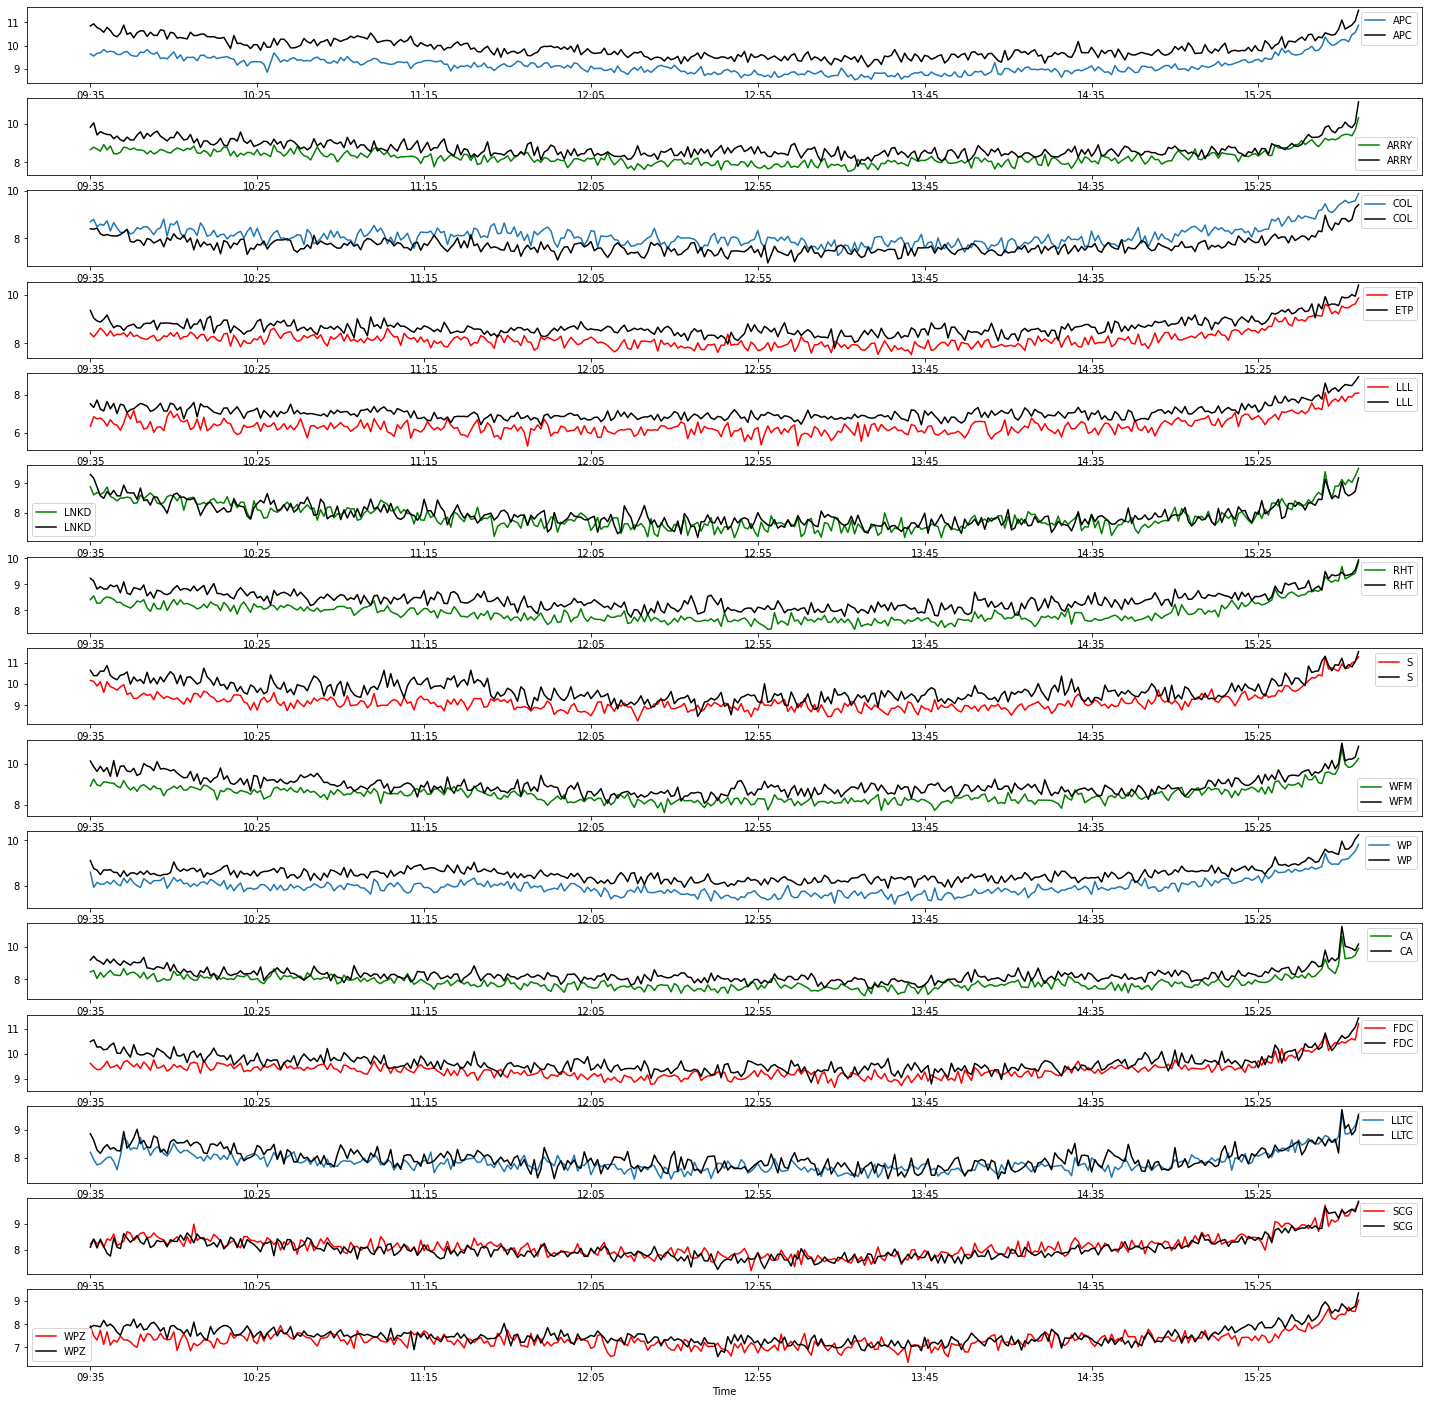

In [27]:
# Mean daily plots TAR by company
f, a = plt.subplots(15,1,figsize=(25,25))
dfTARGroupTimeB.xs('APC').plot(y='logVolume',ax=a[0],label='APC')
dfTARGroupTimeB.xs('ARRY').plot(y='logVolume',ax=a[1],label='ARRY',color='g')
dfTARGroupTimeB.xs('COL').plot(y='logVolume',ax=a[2],label='COL')
dfTARGroupTimeB.xs('ETP').plot(y='logVolume',ax=a[3],label='ETP',color='r')
dfTARGroupTimeB.xs('LLL').plot(y='logVolume',ax=a[4],label='LLL',color='r')
dfTARGroupTimeB.xs('LNKD').plot(y='logVolume',ax=a[5],label='LNKD',color='g')
dfTARGroupTimeB.xs('RHT').plot(y='logVolume',ax=a[6],label='RHT',color='g')
dfTARGroupTimeB.xs('S').plot(y='logVolume',ax=a[7],label='S',color='r')
dfTARGroupTimeB.xs('WFM').plot(y='logVolume',ax=a[8],label='WFM',color='g')
dfTARGroupTimeB.xs('WP').plot(y='logVolume',ax=a[9],label='WP')
dfTARGroupTimeB.xs('CA').plot(y='logVolume',ax=a[10],label='CA',color='g')
dfTARGroupTimeB.xs('FDC').plot(y='logVolume',ax=a[11],label='FDC',color='r')
dfTARGroupTimeB.xs('LLTC').plot(y='logVolume',ax=a[12],label='LLTC')
dfTARGroupTimeB.xs('SCG').plot(y='logVolume',ax=a[13],label='SCG',color='r')
dfTARGroupTimeB.xs('WPZ').plot(y='logVolume',ax=a[14],label='WPZ',color='r')

dfTARGroupTimeA.xs('APC').plot(y='logVolume',ax=a[0],label='APC',color='k')
dfTARGroupTimeA.xs('ARRY').plot(y='logVolume',ax=a[1],label='ARRY',color='k')
dfTARGroupTimeA.xs('COL').plot(y='logVolume',ax=a[2],label='COL',color='k')
dfTARGroupTimeA.xs('ETP').plot(y='logVolume',ax=a[3],label='ETP',color='k')
dfTARGroupTimeA.xs('LLL').plot(y='logVolume',ax=a[4],label='LLL',color='k')
dfTARGroupTimeA.xs('LNKD').plot(y='logVolume',ax=a[5],label='LNKD',color='k')
dfTARGroupTimeA.xs('RHT').plot(y='logVolume',ax=a[6],label='RHT',color='k')
dfTARGroupTimeA.xs('S').plot(y='logVolume',ax=a[7],label='S',color='k')
dfTARGroupTimeA.xs('WFM').plot(y='logVolume',ax=a[8],label='WFM',color='k')
dfTARGroupTimeA.xs('WP').plot(y='logVolume',ax=a[9],label='WP',color='k')
dfTARGroupTimeA.xs('CA').plot(y='logVolume',ax=a[10],label='CA',color='k')
dfTARGroupTimeA.xs('FDC').plot(y='logVolume',ax=a[11],label='FDC',color='k')
dfTARGroupTimeA.xs('LLTC').plot(y='logVolume',ax=a[12],label='LLTC',color='k')
dfTARGroupTimeA.xs('SCG').plot(y='logVolume',ax=a[13],label='SCG',color='k')
dfTARGroupTimeA.xs('WPZ').plot(y='logVolume',ax=a[14],label='WPZ',color='k')


<AxesSubplot:xlabel='Time'>

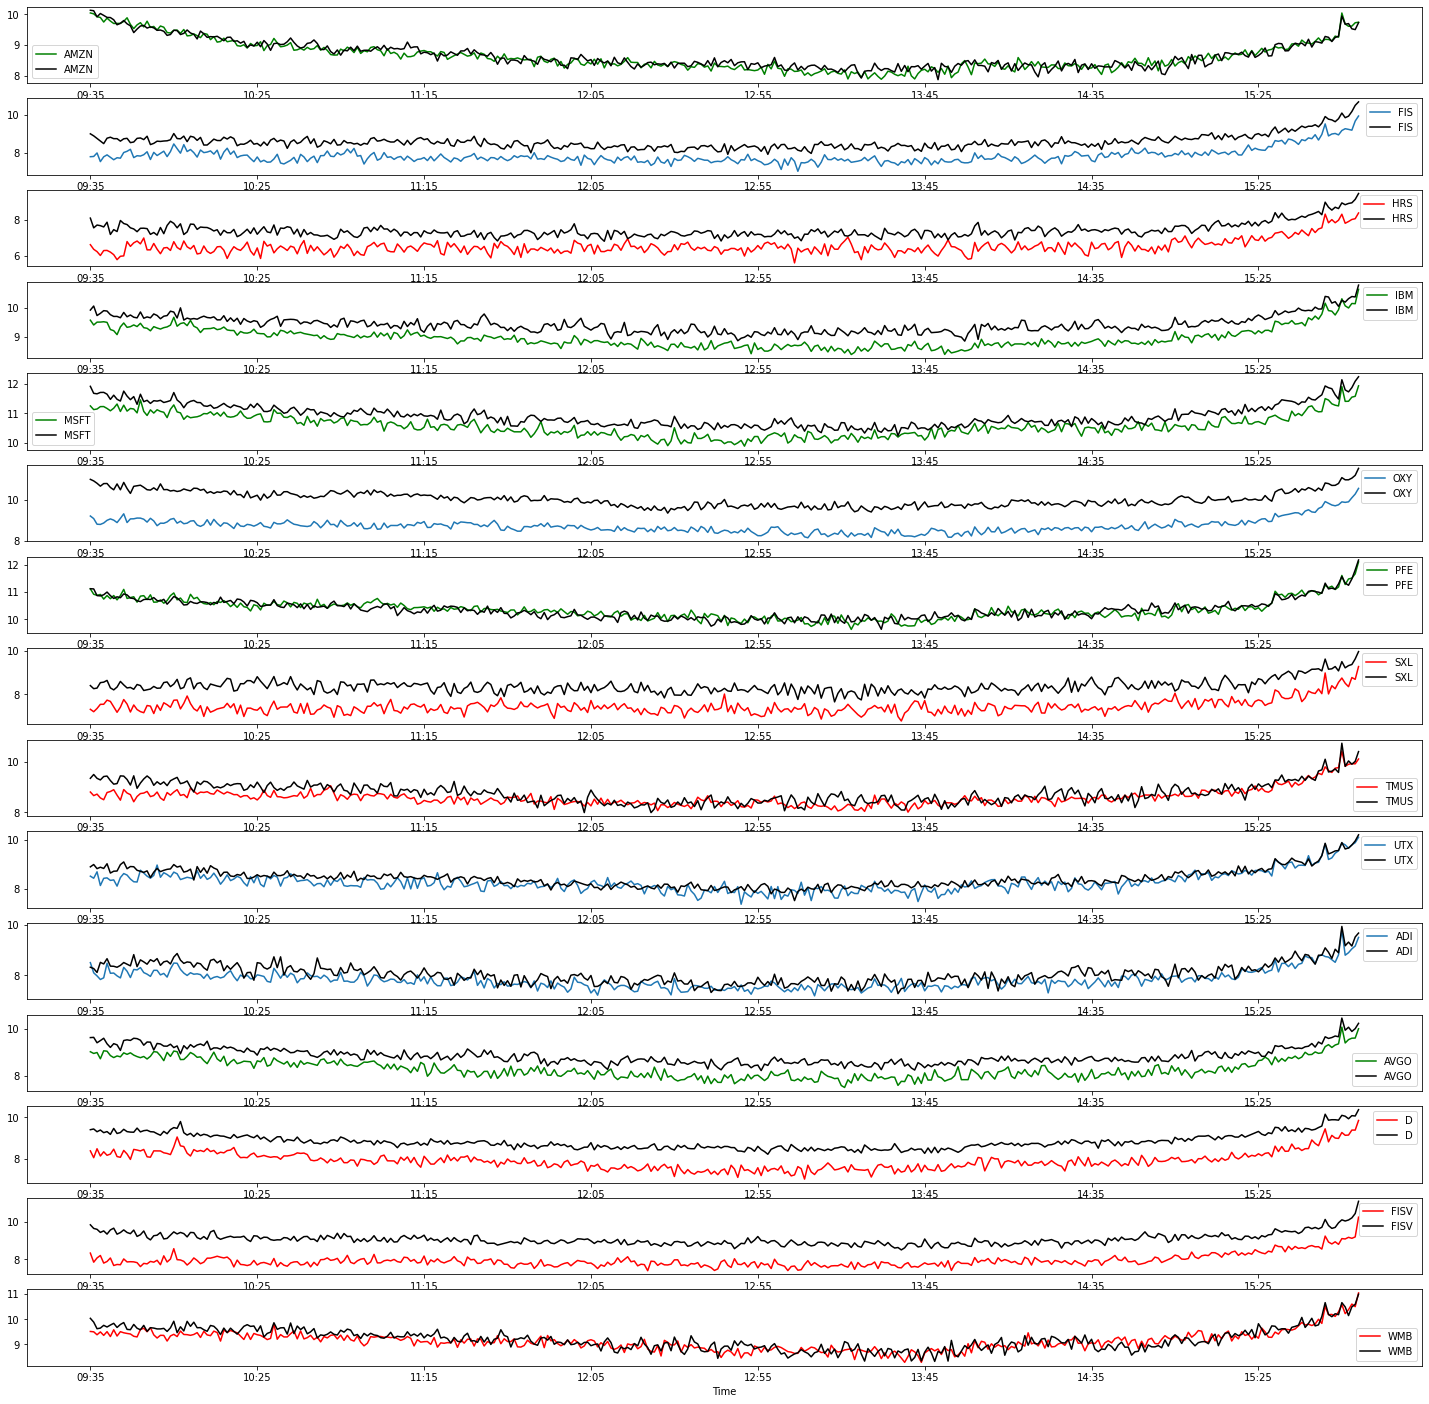

In [28]:
# Mean daily plots ACQ by company
f, a = plt.subplots(15,1,figsize=(25,25))
dfACQGroupTimeB.xs('AMZN').plot(y='logVolume',ax=a[0],label='AMZN',color='g')
dfACQGroupTimeB.xs('FIS').plot(y='logVolume',ax=a[1],label='FIS')
dfACQGroupTimeB.xs('HRS').plot(y='logVolume',ax=a[2],label='HRS',color='r')
dfACQGroupTimeB.xs('IBM').plot(y='logVolume',ax=a[3],label='IBM',color='g')
dfACQGroupTimeB.xs('MSFT').plot(y='logVolume',ax=a[4],label='MSFT',color='g')
dfACQGroupTimeB.xs('OXY').plot(y='logVolume',ax=a[5],label='OXY')
dfACQGroupTimeB.xs('PFE').plot(y='logVolume',ax=a[6],label='PFE',color='g')
dfACQGroupTimeB.xs('SXL').plot(y='logVolume',ax=a[7],label='SXL',color='r')
dfACQGroupTimeB.xs('TMUS').plot(y='logVolume',ax=a[8],label='TMUS',color='r')
dfACQGroupTimeB.xs('UTX').plot(y='logVolume',ax=a[9],label='UTX')
dfACQGroupTimeB.xs('ADI').plot(y='logVolume',ax=a[10],label='ADI')
dfACQGroupTimeB.xs('AVGO').plot(y='logVolume',ax=a[11],label='AVGO',color='g')
dfACQGroupTimeB.xs('D').plot(y='logVolume',ax=a[12],label='D',color='r')
dfACQGroupTimeB.xs('FISV').plot(y='logVolume',ax=a[13],label='FISV',color='r')
dfACQGroupTimeB.xs('WMB').plot(y='logVolume',ax=a[14],label='WMB',color='r')

dfACQGroupTimeA.xs('AMZN').plot(y='logVolume',ax=a[0],label='AMZN',color='k')
dfACQGroupTimeA.xs('FIS').plot(y='logVolume',ax=a[1],label='FIS',color='k')
dfACQGroupTimeA.xs('HRS').plot(y='logVolume',ax=a[2],label='HRS',color='k')
dfACQGroupTimeA.xs('IBM').plot(y='logVolume',ax=a[3],label='IBM',color='k')
dfACQGroupTimeA.xs('MSFT').plot(y='logVolume',ax=a[4],label='MSFT',color='k')
dfACQGroupTimeA.xs('OXY').plot(y='logVolume',ax=a[5],label='OXY',color='k')
dfACQGroupTimeA.xs('PFE').plot(y='logVolume',ax=a[6],label='PFE',color='k')
dfACQGroupTimeA.xs('SXL').plot(y='logVolume',ax=a[7],label='SXL',color='k')
dfACQGroupTimeA.xs('TMUS').plot(y='logVolume',ax=a[8],label='TMUS',color='k')
dfACQGroupTimeA.xs('UTX').plot(y='logVolume',ax=a[9],label='UTX',color='k')
dfACQGroupTimeA.xs('ADI').plot(y='logVolume',ax=a[10],label='ADI',color='k')
dfACQGroupTimeA.xs('AVGO').plot(y='logVolume',ax=a[11],label='AVGO',color='k')
dfACQGroupTimeA.xs('D').plot(y='logVolume',ax=a[12],label='D',color='k')
dfACQGroupTimeA.xs('FISV').plot(y='logVolume',ax=a[13],label='FISV',color='k')
dfACQGroupTimeA.xs('WMB').plot(y='logVolume',ax=a[14],label='WMB',color='k')

<AxesSubplot:xlabel='Time'>

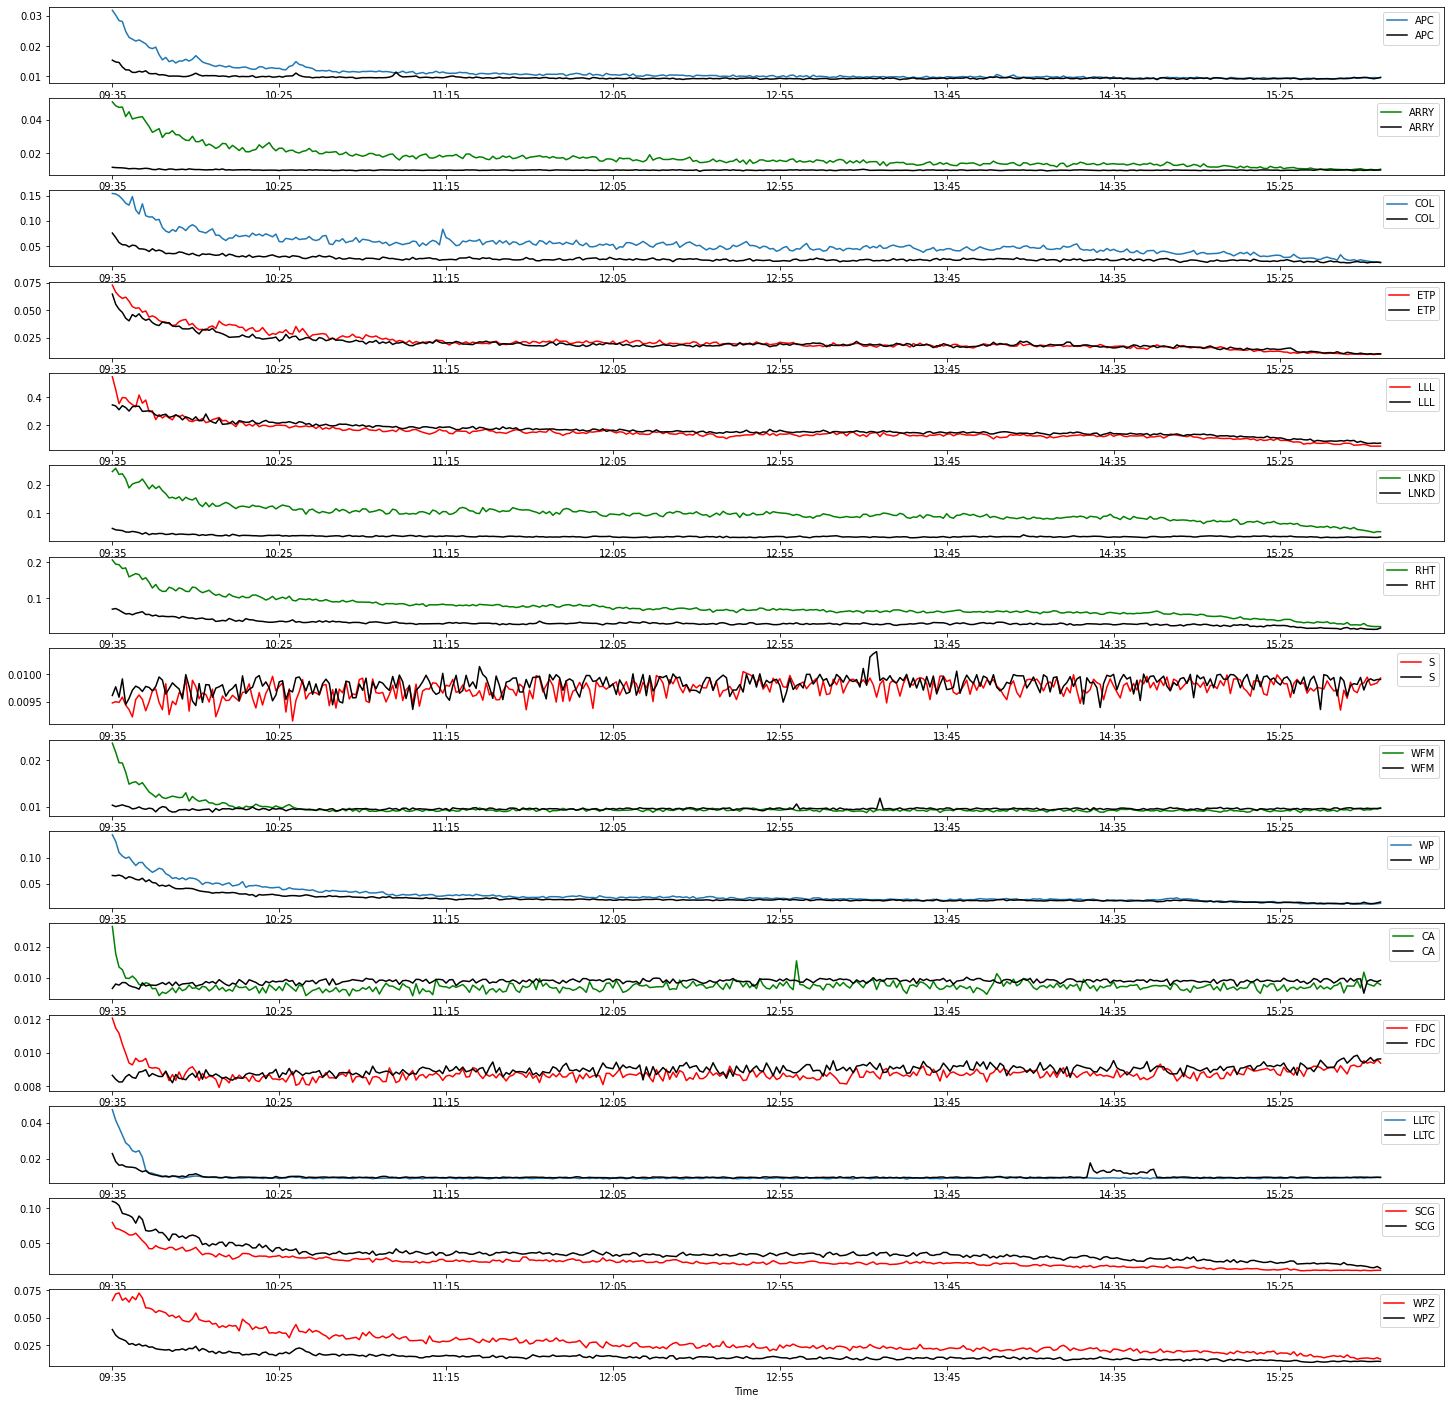

In [29]:
# Mean daily plots TAR by company
f, a = plt.subplots(15,1,figsize=(25,25))
dfTARGroupTimeB.xs('APC').plot(y='QuotedSpread',ax=a[0],label='APC')
dfTARGroupTimeB.xs('ARRY').plot(y='QuotedSpread',ax=a[1],label='ARRY',color='g')
dfTARGroupTimeB.xs('COL').plot(y='QuotedSpread',ax=a[2],label='COL')
dfTARGroupTimeB.xs('ETP').plot(y='QuotedSpread',ax=a[3],label='ETP',color='r')
dfTARGroupTimeB.xs('LLL').plot(y='QuotedSpread',ax=a[4],label='LLL',color='r')
dfTARGroupTimeB.xs('LNKD').plot(y='QuotedSpread',ax=a[5],label='LNKD',color='g')
dfTARGroupTimeB.xs('RHT').plot(y='QuotedSpread',ax=a[6],label='RHT',color='g')
dfTARGroupTimeB.xs('S').plot(y='QuotedSpread',ax=a[7],label='S',color='r')
dfTARGroupTimeB.xs('WFM').plot(y='QuotedSpread',ax=a[8],label='WFM',color='g')
dfTARGroupTimeB.xs('WP').plot(y='QuotedSpread',ax=a[9],label='WP')
dfTARGroupTimeB.xs('CA').plot(y='QuotedSpread',ax=a[10],label='CA',color='g')
dfTARGroupTimeB.xs('FDC').plot(y='QuotedSpread',ax=a[11],label='FDC',color='r')
dfTARGroupTimeB.xs('LLTC').plot(y='QuotedSpread',ax=a[12],label='LLTC')
dfTARGroupTimeB.xs('SCG').plot(y='QuotedSpread',ax=a[13],label='SCG',color='r')
dfTARGroupTimeB.xs('WPZ').plot(y='QuotedSpread',ax=a[14],label='WPZ',color='r')

dfTARGroupTimeA.xs('APC').plot(y='QuotedSpread',ax=a[0],label='APC',color='k')
dfTARGroupTimeA.xs('ARRY').plot(y='QuotedSpread',ax=a[1],label='ARRY',color='k')
dfTARGroupTimeA.xs('COL').plot(y='QuotedSpread',ax=a[2],label='COL',color='k')
dfTARGroupTimeA.xs('ETP').plot(y='QuotedSpread',ax=a[3],label='ETP',color='k')
dfTARGroupTimeA.xs('LLL').plot(y='QuotedSpread',ax=a[4],label='LLL',color='k')
dfTARGroupTimeA.xs('LNKD').plot(y='QuotedSpread',ax=a[5],label='LNKD',color='k')
dfTARGroupTimeA.xs('RHT').plot(y='QuotedSpread',ax=a[6],label='RHT',color='k')
dfTARGroupTimeA.xs('S').plot(y='QuotedSpread',ax=a[7],label='S',color='k')
dfTARGroupTimeA.xs('WFM').plot(y='QuotedSpread',ax=a[8],label='WFM',color='k')
dfTARGroupTimeA.xs('WP').plot(y='QuotedSpread',ax=a[9],label='WP',color='k')
dfTARGroupTimeA.xs('CA').plot(y='QuotedSpread',ax=a[10],label='CA',color='k')
dfTARGroupTimeA.xs('FDC').plot(y='QuotedSpread',ax=a[11],label='FDC',color='k')
dfTARGroupTimeA.xs('LLTC').plot(y='QuotedSpread',ax=a[12],label='LLTC',color='k')
dfTARGroupTimeA.xs('SCG').plot(y='QuotedSpread',ax=a[13],label='SCG',color='k')
dfTARGroupTimeA.xs('WPZ').plot(y='QuotedSpread',ax=a[14],label='WPZ',color='k')

<AxesSubplot:xlabel='Time'>

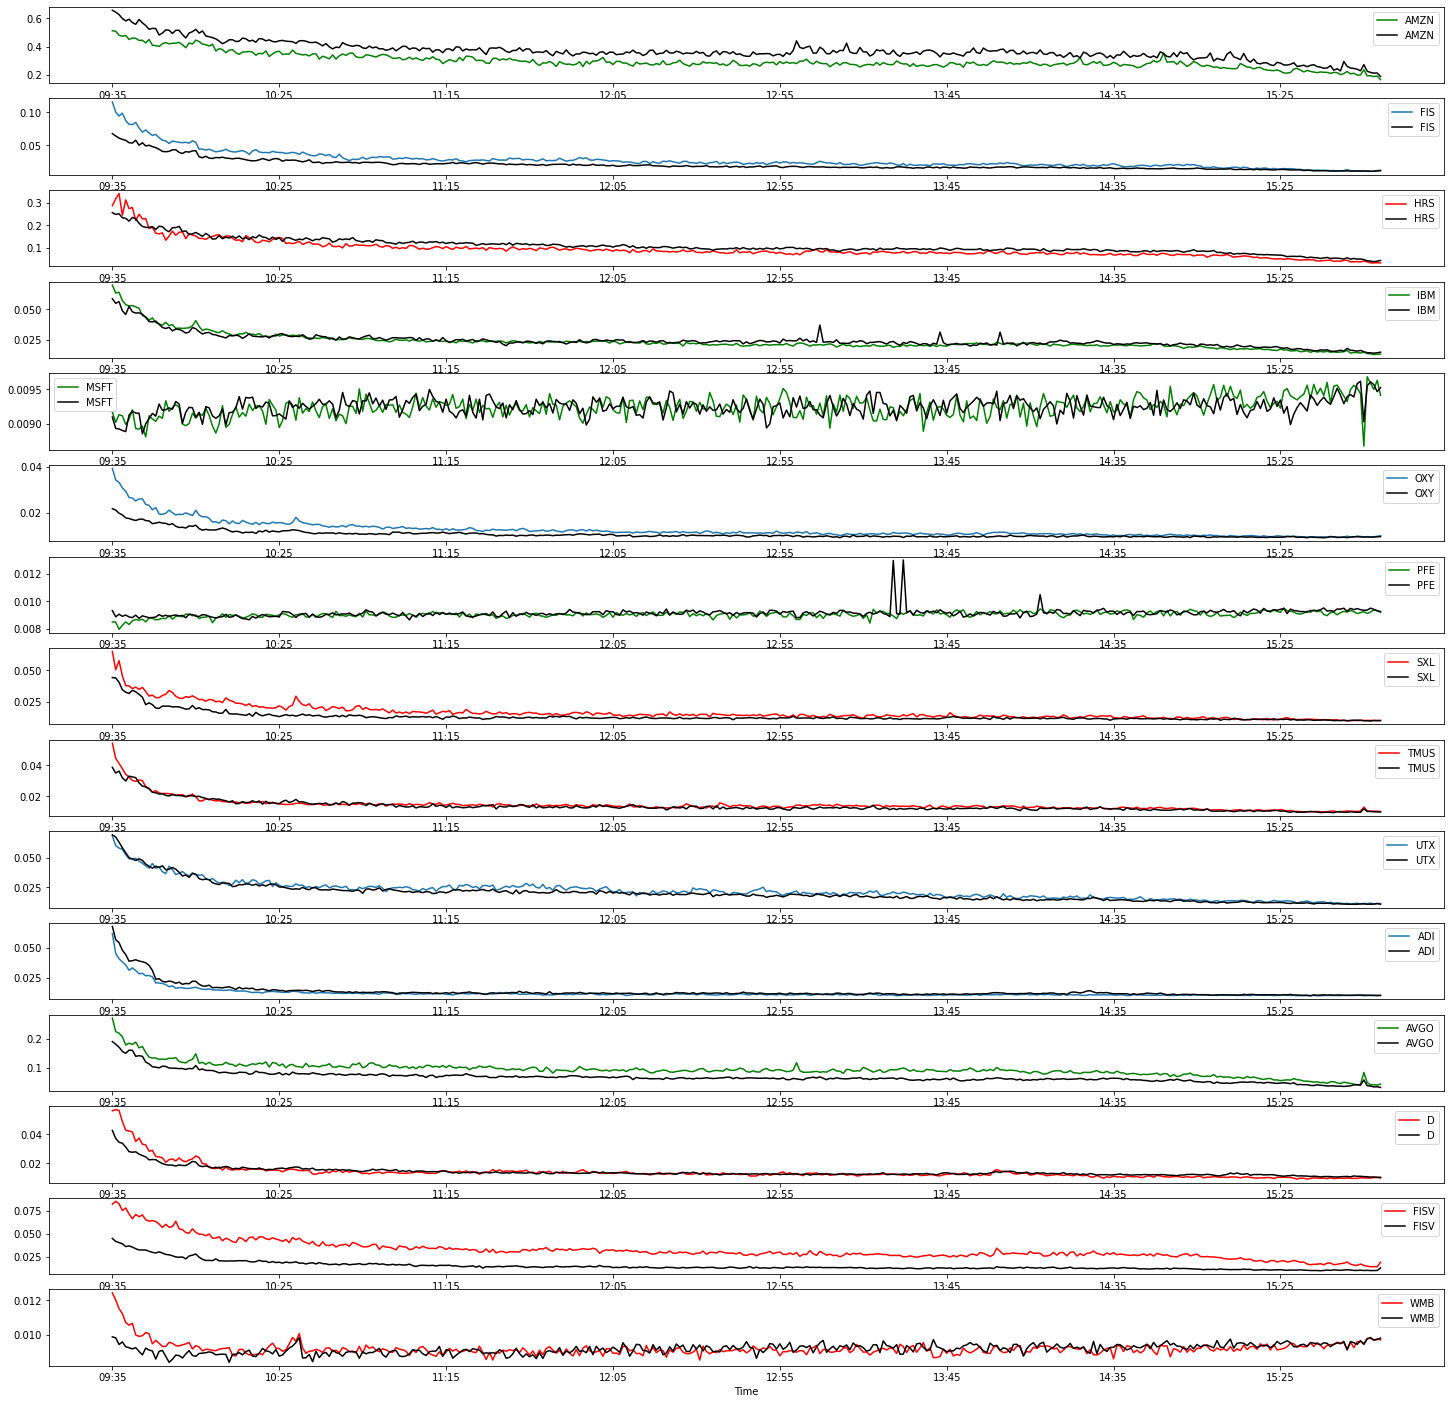

In [30]:
# Mean daily plots ACQ by company
f, a = plt.subplots(15,1,figsize=(25,25))
dfACQGroupTimeB.xs('AMZN').plot(y='QuotedSpread',ax=a[0],label='AMZN',color='g')
dfACQGroupTimeB.xs('FIS').plot(y='QuotedSpread',ax=a[1],label='FIS')
dfACQGroupTimeB.xs('HRS').plot(y='QuotedSpread',ax=a[2],label='HRS',color='r')
dfACQGroupTimeB.xs('IBM').plot(y='QuotedSpread',ax=a[3],label='IBM',color='g')
dfACQGroupTimeB.xs('MSFT').plot(y='QuotedSpread',ax=a[4],label='MSFT',color='g')
dfACQGroupTimeB.xs('OXY').plot(y='QuotedSpread',ax=a[5],label='OXY')
dfACQGroupTimeB.xs('PFE').plot(y='QuotedSpread',ax=a[6],label='PFE',color='g')
dfACQGroupTimeB.xs('SXL').plot(y='QuotedSpread',ax=a[7],label='SXL',color='r')
dfACQGroupTimeB.xs('TMUS').plot(y='QuotedSpread',ax=a[8],label='TMUS',color='r')
dfACQGroupTimeB.xs('UTX').plot(y='QuotedSpread',ax=a[9],label='UTX')
dfACQGroupTimeB.xs('ADI').plot(y='QuotedSpread',ax=a[10],label='ADI')
dfACQGroupTimeB.xs('AVGO').plot(y='QuotedSpread',ax=a[11],label='AVGO',color='g')
dfACQGroupTimeB.xs('D').plot(y='QuotedSpread',ax=a[12],label='D',color='r')
dfACQGroupTimeB.xs('FISV').plot(y='QuotedSpread',ax=a[13],label='FISV',color='r')
dfACQGroupTimeB.xs('WMB').plot(y='QuotedSpread',ax=a[14],label='WMB',color='r')

dfACQGroupTimeA.xs('AMZN').plot(y='QuotedSpread',ax=a[0],label='AMZN',color='k')
dfACQGroupTimeA.xs('FIS').plot(y='QuotedSpread',ax=a[1],label='FIS',color='k')
dfACQGroupTimeA.xs('HRS').plot(y='QuotedSpread',ax=a[2],label='HRS',color='k')
dfACQGroupTimeA.xs('IBM').plot(y='QuotedSpread',ax=a[3],label='IBM',color='k')
dfACQGroupTimeA.xs('MSFT').plot(y='QuotedSpread',ax=a[4],label='MSFT',color='k')
dfACQGroupTimeA.xs('OXY').plot(y='QuotedSpread',ax=a[5],label='OXY',color='k')
dfACQGroupTimeA.xs('PFE').plot(y='QuotedSpread',ax=a[6],label='PFE',color='k')
dfACQGroupTimeA.xs('SXL').plot(y='QuotedSpread',ax=a[7],label='SXL',color='k')
dfACQGroupTimeA.xs('TMUS').plot(y='QuotedSpread',ax=a[8],label='TMUS',color='k')
dfACQGroupTimeA.xs('UTX').plot(y='QuotedSpread',ax=a[9],label='UTX',color='k')
dfACQGroupTimeA.xs('ADI').plot(y='QuotedSpread',ax=a[10],label='ADI',color='k')
dfACQGroupTimeA.xs('AVGO').plot(y='QuotedSpread',ax=a[11],label='AVGO',color='k')
dfACQGroupTimeA.xs('D').plot(y='QuotedSpread',ax=a[12],label='D',color='k')
dfACQGroupTimeA.xs('FISV').plot(y='QuotedSpread',ax=a[13],label='FISV',color='k')
dfACQGroupTimeA.xs('WMB').plot(y='QuotedSpread',ax=a[14],label='WMB',color='k')

In [12]:
dfTARGroupDate = dfTAR.groupby(['Ticker','Datetime']).mean()
dfACQGroupDate = dfACQ.groupby(['Ticker','Datetime']).mean()

In [13]:
dfTARGroupDate.index.levels[-1].astype('str')
dfACQGroupDate.index.levels[-1].astype('str')

Index(['2016-05-02 09:35:00', '2016-05-02 09:36:00', '2016-05-02 09:37:00',
       '2016-05-02 09:38:00', '2016-05-02 09:39:00', '2016-05-02 09:40:00',
       '2016-05-02 09:41:00', '2016-05-02 09:42:00', '2016-05-02 09:43:00',
       '2016-05-02 09:44:00',
       ...
       '2019-07-31 15:46:00', '2019-07-31 15:47:00', '2019-07-31 15:48:00',
       '2019-07-31 15:49:00', '2019-07-31 15:50:00', '2019-07-31 15:51:00',
       '2019-07-31 15:52:00', '2019-07-31 15:53:00', '2019-07-31 15:54:00',
       '2019-07-31 15:55:00'],
      dtype='object', name='Datetime', length=261663)

In [14]:
AMZN_DT_Arr = dfACQGroupDate.xs('AMZN').index.to_numpy()
WFM_DT_Arr = dfTARGroupDate.xs('WFM').index.to_numpy()
AMZN_DT = np.where(AMZN_DT_Arr == '2017-06-16 09:36:00')[0][0]
WFM_DT = np.where(WFM_DT_Arr == '2017-06-16 09:50:00')[0][0]

FIS_DT_Arr = dfACQGroupDate.xs('FIS').index.to_numpy()
WP_DT_Arr = dfTARGroupDate.xs('WP').index.to_numpy()
FIS_DT = np.where(FIS_DT_Arr == '2019-03-18 09:36:00')[0][0]
WP_DT = np.where(WP_DT_Arr == '2019-03-18 09:36:00')[0][0]

HRS_DT_Arr = dfACQGroupDate.xs('HRS').index.to_numpy()
LLL_DT_Arr = dfTARGroupDate.xs('LLL').index.to_numpy()
HRS_DT = np.where(HRS_DT_Arr == '2018-10-15 09:36:00')[0][0]
LLL_DT = np.where(LLL_DT_Arr == '2018-10-15 09:36:00')[0][0]

IBM_DT_Arr = dfACQGroupDate.xs('IBM').index.to_numpy()
RHT_DT_Arr = dfTARGroupDate.xs('RHT').index.to_numpy()
IBM_DT = np.where(IBM_DT_Arr == '2018-10-29 09:36:00')[0][0]
RHT_DT = np.where(RHT_DT_Arr == '2018-10-29 09:36:00')[0][0]

MSFT_DT_Arr = dfACQGroupDate.xs('MSFT').index.to_numpy()
LNKD_DT_Arr = dfTARGroupDate.xs('LNKD').index.to_numpy()
MSFT_DT = np.where(MSFT_DT_Arr == '2016-06-13 09:36:00')[0][0]
LNKD_DT = np.where(LNKD_DT_Arr == '2016-06-13 09:36:00')[0][0]

OXY_DT_Arr = dfACQGroupDate.xs('OXY').index.to_numpy()
APC_DT_Arr = dfTARGroupDate.xs('APC').index.to_numpy()
OXY_DT = np.where(OXY_DT_Arr == '2019-04-24 09:36:00')[0][0]
APC_DT = np.where(APC_DT_Arr == '2019-04-24 09:36:00')[0][0]

PFE_DT_Arr = dfACQGroupDate.xs('PFE').index.to_numpy()
ARRY_DT_Arr = dfTARGroupDate.xs('ARRY').index.to_numpy()
PFE_DT = np.where(PFE_DT_Arr == '2019-06-17 09:36:00')[0][0]
ARRY_DT = np.where(ARRY_DT_Arr == '2019-06-17 09:36:00')[0][0]

SXL_DT_Arr = dfACQGroupDate.xs('SXL').index.to_numpy()
ETP_DT_Arr = dfTARGroupDate.xs('ETP').index.to_numpy()
SXL_DT = np.where(SXL_DT_Arr == '2016-11-21 09:36:00')[0][0]
ETP_DT = np.where(ETP_DT_Arr == '2016-11-21 09:36:00')[0][0]

TMUS_DT_Arr = dfACQGroupDate.xs('TMUS').index.to_numpy()
S_DT_Arr = dfTARGroupDate.xs('S').index.to_numpy()
TMUS_DT = np.where(TMUS_DT_Arr == '2018-04-30 09:36:00')[0][0]
S_DT = np.where(S_DT_Arr == '2018-04-30 09:36:00')[0][0]

UTX_DT_Arr = dfACQGroupDate.xs('UTX').index.to_numpy()
COL_DT_Arr = dfTARGroupDate.xs('COL').index.to_numpy()
UTX_DT = np.where(UTX_DT_Arr == '2017-09-05 09:36:00')[0][0] #correct for labour day
COL_DT = np.where(COL_DT_Arr == '2017-09-05 09:36:00')[0][0] #correct for labour day

ADI_DT_Arr = dfACQGroupDate.xs('ADI').index.to_numpy()
LLTC_DT_Arr = dfTARGroupDate.xs('LLTC').index.to_numpy()
ADI_DT = np.where(ADI_DT_Arr == '2016-07-26 09:36:00')[0][0]
LLTC_DT = np.where(LLTC_DT_Arr == '2016-07-26 09:36:00')[0][0]

D_DT_Arr = dfACQGroupDate.xs('D').index.to_numpy()
SCG_DT_Arr = dfTARGroupDate.xs('SCG').index.to_numpy()
D_DT = np.where(D_DT_Arr == '2018-01-03 09:36:00')[0][0]
SCG_DT = np.where(SCG_DT_Arr == '2018-01-03 09:36:00')[0][0]

WMB_DT_Arr = dfACQGroupDate.xs('WMB').index.to_numpy()
WPZ_DT_Arr = dfTARGroupDate.xs('WPZ').index.to_numpy()
WMB_DT = np.where(WMB_DT_Arr == '2018-05-17 09:36:00')[0][0]
WPZ_DT = np.where(WPZ_DT_Arr == '2018-05-17 09:36:00')[0][0]

AVGO_DT_Arr = dfACQGroupDate.xs('AVGO').index.to_numpy()
CA_DT_Arr = dfTARGroupDate.xs('CA').index.to_numpy()
AVGO_DT = np.where(AVGO_DT_Arr == '2018-07-12 09:36:00')[0][0] #overnight adjustment
CA_DT = np.where(CA_DT_Arr == '2018-07-12 09:36:00')[0][0] #overnight adjustment

FISV_DT_Arr = dfACQGroupDate.xs('FISV').index.to_numpy()
FDC_DT_Arr = dfTARGroupDate.xs('FDC').index.to_numpy()
FISV_DT = np.where(FISV_DT_Arr == '2019-01-16 09:36:00')[0][0]
FDC_DT = np.where(FDC_DT_Arr == '2019-01-16 09:36:00')[0][0]

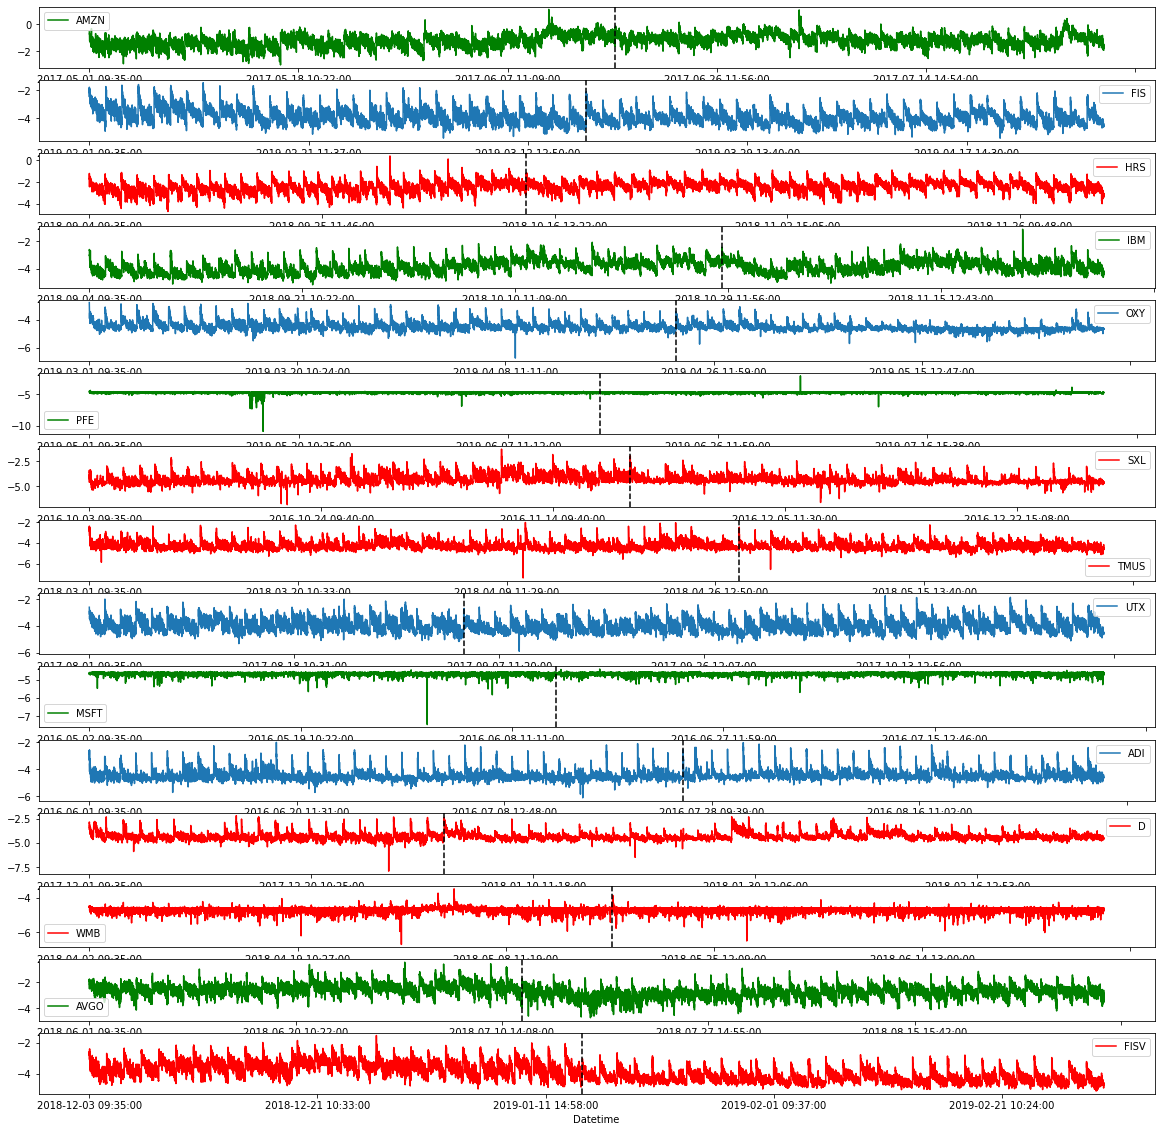

In [30]:
# Plots quoted spread over time for ACQS
f, a = plt.subplots(15,1,figsize=(20,20))
dfACQGroupDate.xs('AMZN').plot(y='logSpread',ax=a[0],label='AMZN',color='g')
a[0].axvline(AMZN_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FIS').plot(y='logSpread',ax=a[1],label='FIS')
a[1].axvline(FIS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('HRS').plot(y='logSpread',ax=a[2],label='HRS', color='r')
a[2].axvline(HRS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('IBM').plot(y='logSpread',ax=a[3],label='IBM',color='g')
a[3].axvline(IBM_DT, color='k', linestyle='--')

dfACQGroupDate.xs('OXY').plot(y='logSpread',ax=a[4],label='OXY')
a[4].axvline(OXY_DT, color='k', linestyle='--')

dfACQGroupDate.xs('PFE').plot(y='logSpread',ax=a[5],label='PFE',color='g')
a[5].axvline(PFE_DT, color='k', linestyle='--')

dfACQGroupDate.xs('SXL').plot(y='logSpread',ax=a[6],label='SXL',color='r')
a[6].axvline(SXL_DT, color='k', linestyle='--')

dfACQGroupDate.xs('TMUS').plot(y='logSpread',ax=a[7],label='TMUS',color='r')
a[7].axvline(TMUS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('UTX').plot(y='logSpread',ax=a[8],label='UTX')
a[8].axvline(UTX_DT, color='k', linestyle='--')

dfACQGroupDate.xs('MSFT').plot(y='logSpread',ax=a[9],label='MSFT',color='g')
a[9].axvline(MSFT_DT, color='k', linestyle='--')

dfACQGroupDate.xs('ADI').plot(y='logSpread',ax=a[10],label='ADI')
a[10].axvline(ADI_DT, color='k', linestyle='--')

dfACQGroupDate.xs('D').plot(y='logSpread',ax=a[11],label='D',color = 'r')
a[11].axvline(D_DT, color='k', linestyle='--')

dfACQGroupDate.xs('WMB').plot(y='logSpread',ax=a[12],label='WMB',color='r')
a[12].axvline(WMB_DT, color='k', linestyle='--')

dfACQGroupDate.xs('AVGO').plot(y='logSpread',ax=a[13],label='AVGO',color='g')
a[13].axvline(AVGO_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FISV').plot(y='logSpread',ax=a[14],label='FISV',color='r')
a[14].axvline(FISV_DT, color='k', linestyle='--')

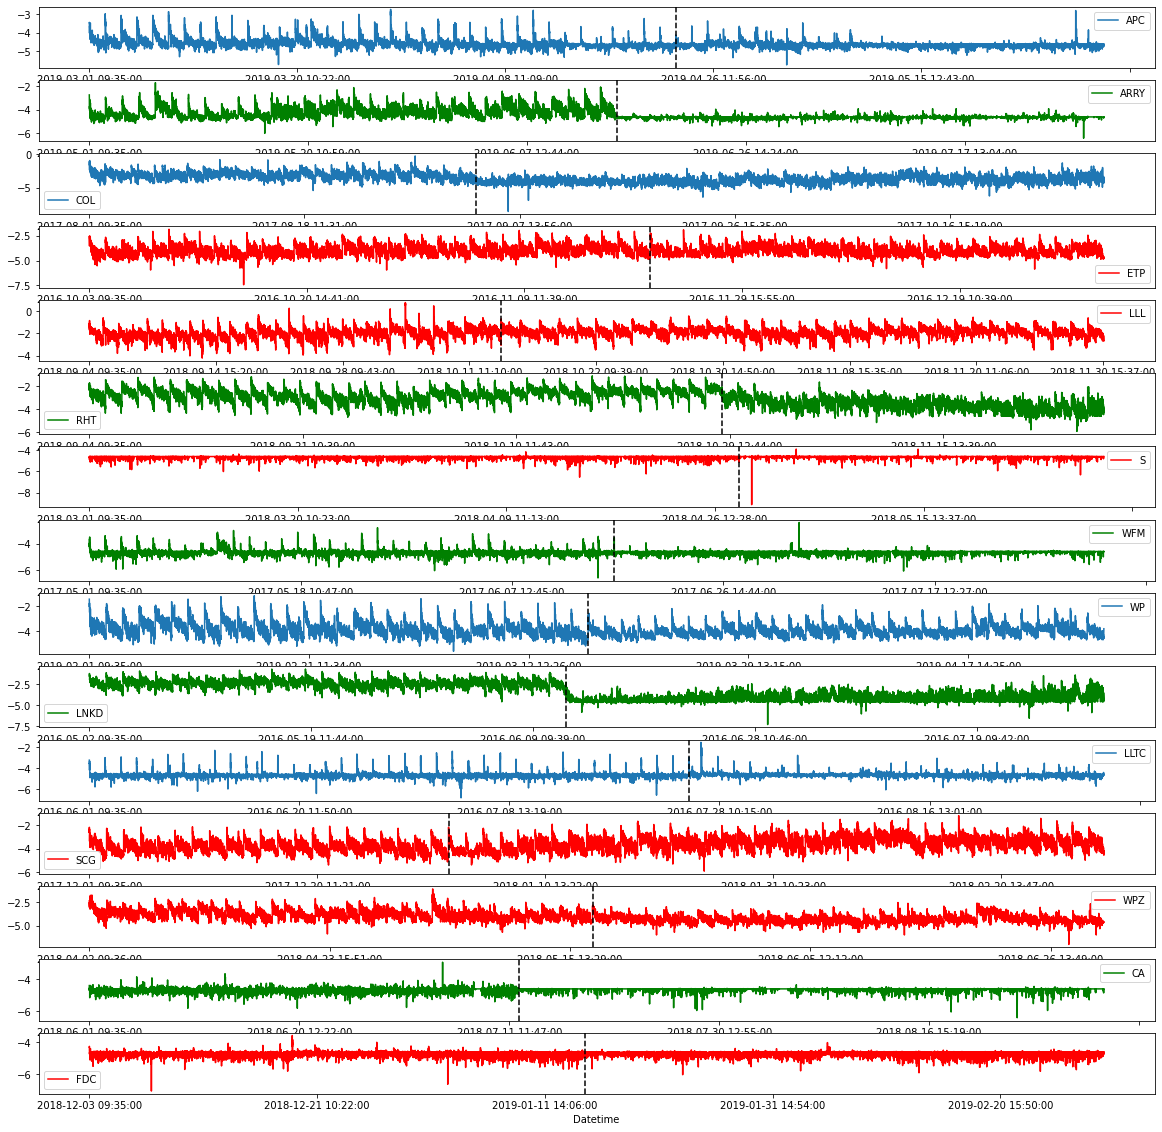

In [50]:
# Plot of Spread over time for TAR by company
f, a = plt.subplots(15,1,figsize=(20,20))
dfTARGroupDate.xs('APC').plot(y='logSpread',ax=a[0],label='APC')
a[0].axvline(APC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ARRY').plot(y='logSpread',ax=a[1],label='ARRY',color='g')
a[1].axvline(ARRY_DT, color='k', linestyle='--')

dfTARGroupDate.xs('COL').plot(y='logSpread',ax=a[2],label='COL')
a[2].axvline(COL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ETP').plot(y='logSpread',ax=a[3],label='ETP',color='r')
a[3].axvline(ETP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLL').plot(y='logSpread',ax=a[4],label='LLL',color='r')
a[4].axvline(LLL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('RHT').plot(y='logSpread',ax=a[5],label='RHT',color='g')
a[5].axvline(RHT_DT, color='k', linestyle='--')

dfTARGroupDate.xs('S').plot(y='logSpread',ax=a[6],label='S',color='r')
a[6].axvline(S_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WFM').plot(y='logSpread',ax=a[7],label='WFM',color='g')
a[7].axvline(WFM_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WP').plot(y='logSpread',ax=a[8],label='WP')
a[8].axvline(WP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LNKD').plot(y='logSpread',ax=a[9],label='LNKD',color='g')
a[9].axvline(LNKD_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLTC').plot(y='logSpread',ax=a[10],label='LLTC')
a[10].axvline(LLTC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('SCG').plot(y='logSpread',ax=a[11],label='SCG',color='r')
a[11].axvline(SCG_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WPZ').plot(y='logSpread',ax=a[12],label='WPZ',color='r')
a[12].axvline(WPZ_DT, color='k', linestyle='--')

dfTARGroupDate.xs('CA').plot(y='logSpread',ax=a[13],label='CA',color='g')
a[13].axvline(CA_DT, color='k', linestyle='--')

dfTARGroupDate.xs('FDC').plot(y='logSpread',ax=a[14],label='FDC',color='r')
a[14].axvline(FDC_DT, color='k', linestyle='--')

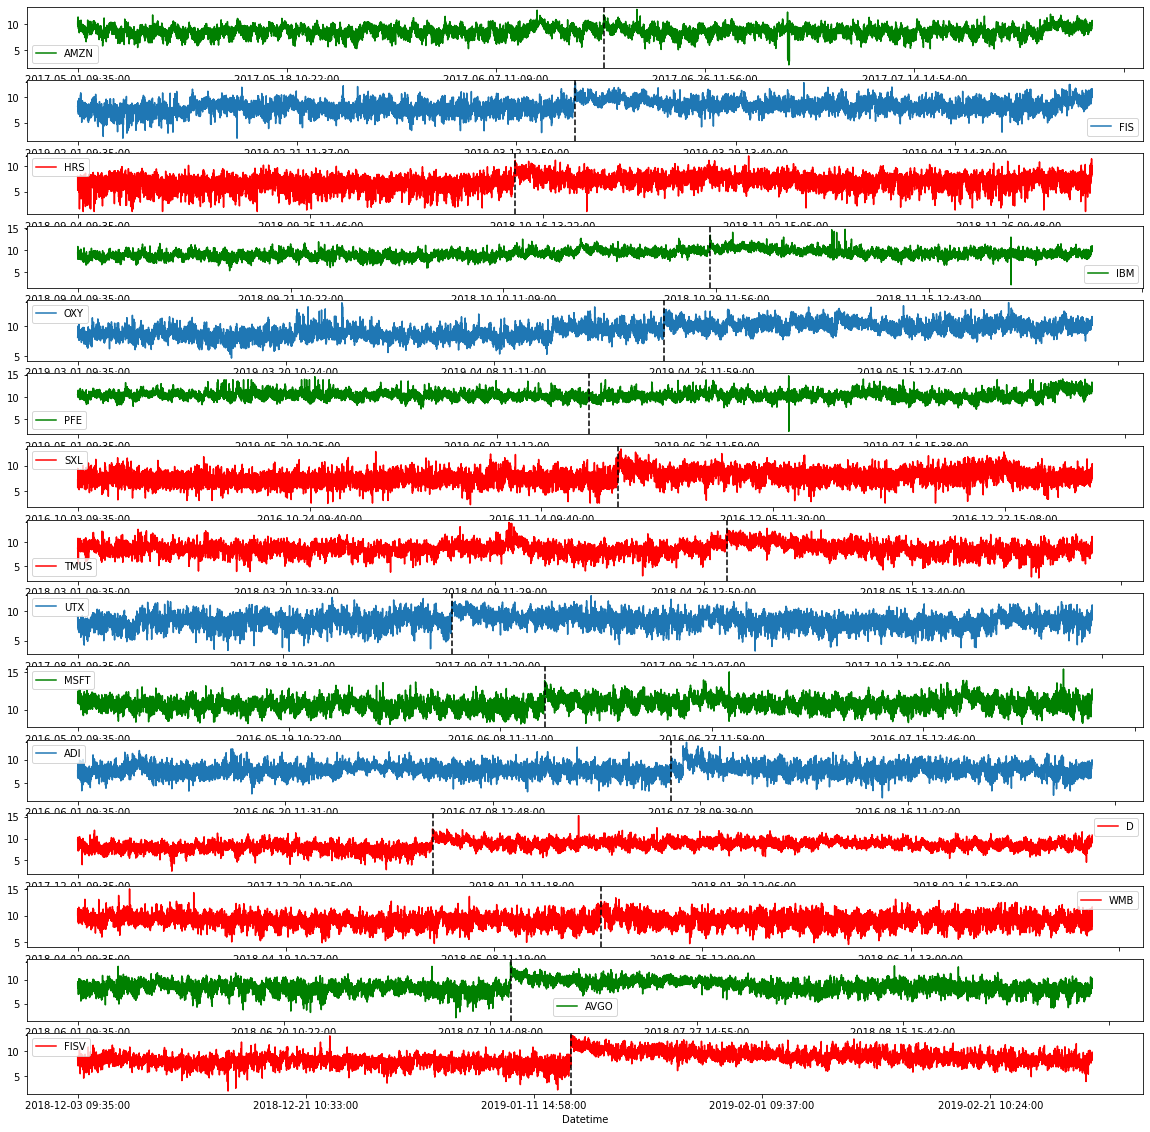

In [22]:
# Plots Log Volume for ACQS
f, a = plt.subplots(15,1,figsize=(20,20))
dfACQGroupDate.xs('AMZN').plot(y='logVolume',ax=a[0],label='AMZN',color='g')
a[0].axvline(AMZN_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FIS').plot(y='logVolume',ax=a[1],label='FIS')
a[1].axvline(FIS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('HRS').plot(y='logVolume',ax=a[2],label='HRS', color='r')
a[2].axvline(HRS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('IBM').plot(y='logVolume',ax=a[3],label='IBM',color='g')
a[3].axvline(IBM_DT, color='k', linestyle='--')

dfACQGroupDate.xs('OXY').plot(y='logVolume',ax=a[4],label='OXY')
a[4].axvline(OXY_DT, color='k', linestyle='--')

dfACQGroupDate.xs('PFE').plot(y='logVolume',ax=a[5],label='PFE',color='g')
a[5].axvline(PFE_DT, color='k', linestyle='--')

dfACQGroupDate.xs('SXL').plot(y='logVolume',ax=a[6],label='SXL',color='r')
a[6].axvline(SXL_DT, color='k', linestyle='--')

dfACQGroupDate.xs('TMUS').plot(y='logVolume',ax=a[7],label='TMUS',color='r')
a[7].axvline(TMUS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('UTX').plot(y='logVolume',ax=a[8],label='UTX')
a[8].axvline(UTX_DT, color='k', linestyle='--')

dfACQGroupDate.xs('MSFT').plot(y='logVolume',ax=a[9],label='MSFT',color='g')
a[9].axvline(MSFT_DT, color='k', linestyle='--')

dfACQGroupDate.xs('ADI').plot(y='logVolume',ax=a[10],label='ADI')
a[10].axvline(ADI_DT, color='k', linestyle='--')

dfACQGroupDate.xs('D').plot(y='logVolume',ax=a[11],label='D',color='r')
a[11].axvline(D_DT, color='k', linestyle='--')

dfACQGroupDate.xs('WMB').plot(y='logVolume',ax=a[12],label='WMB',color='r')
a[12].axvline(WMB_DT, color='k', linestyle='--')

dfACQGroupDate.xs('AVGO').plot(y='logVolume',ax=a[13],label='AVGO',color='g')
a[13].axvline(AVGO_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FISV').plot(y='logVolume',ax=a[14],label='FISV',color='r')
a[14].axvline(FISV_DT, color='k', linestyle='--')

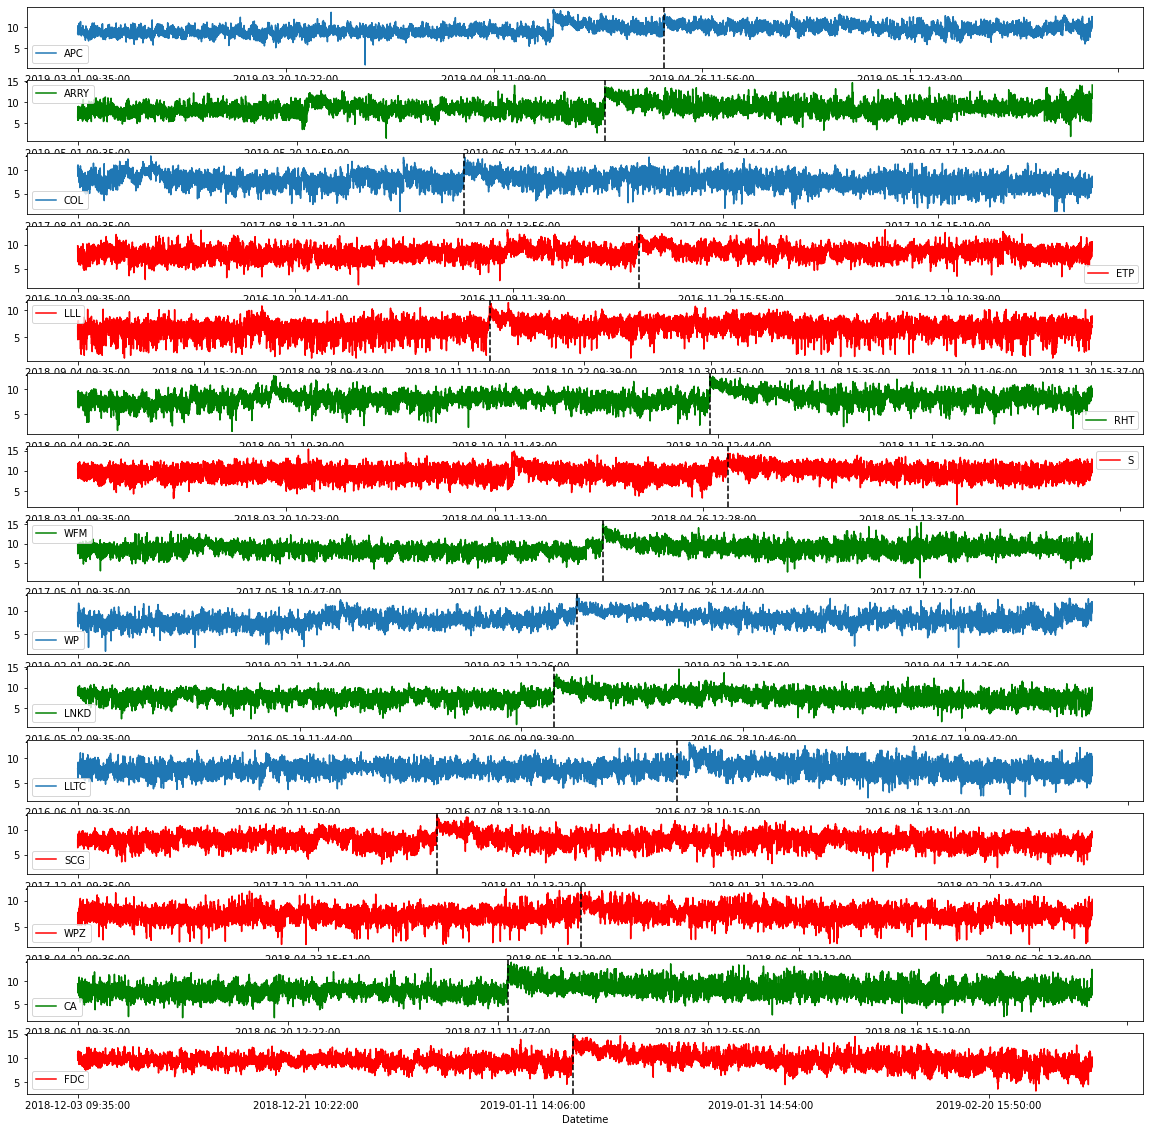

In [23]:
# Plot of logVolume over time for TAR by company
f, a = plt.subplots(15,1,figsize=(20,20))
dfTARGroupDate.xs('APC').plot(y='logVolume',ax=a[0],label='APC')
a[0].axvline(APC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ARRY').plot(y='logVolume',ax=a[1],label='ARRY',color='g')
a[1].axvline(ARRY_DT, color='k', linestyle='--')

dfTARGroupDate.xs('COL').plot(y='logVolume',ax=a[2],label='COL')
a[2].axvline(COL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ETP').plot(y='logVolume',ax=a[3],label='ETP',color='r')
a[3].axvline(ETP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLL').plot(y='logVolume',ax=a[4],label='LLL',color='r')
a[4].axvline(LLL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('RHT').plot(y='logVolume',ax=a[5],label='RHT',color='g')
a[5].axvline(RHT_DT, color='k', linestyle='--')

dfTARGroupDate.xs('S').plot(y='logVolume',ax=a[6],label='S',color='r')
a[6].axvline(S_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WFM').plot(y='logVolume',ax=a[7],label='WFM',color='g')
a[7].axvline(WFM_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WP').plot(y='logVolume',ax=a[8],label='WP')
a[8].axvline(WP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LNKD').plot(y='logVolume',ax=a[9],label='LNKD',color='g')
a[9].axvline(LNKD_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLTC').plot(y='logVolume',ax=a[10],label='LLTC')
a[10].axvline(LLTC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('SCG').plot(y='logVolume',ax=a[11],label='SCG',color='r')
a[11].axvline(SCG_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WPZ').plot(y='logVolume',ax=a[12],label='WPZ',color='r')
a[12].axvline(WPZ_DT, color='k', linestyle='--')

dfTARGroupDate.xs('CA').plot(y='logVolume',ax=a[13],label='CA',color='g')
a[13].axvline(CA_DT, color='k', linestyle='--')

dfTARGroupDate.xs('FDC').plot(y='logVolume',ax=a[14],label='FDC',color='r')
a[14].axvline(FDC_DT, color='k', linestyle='--')

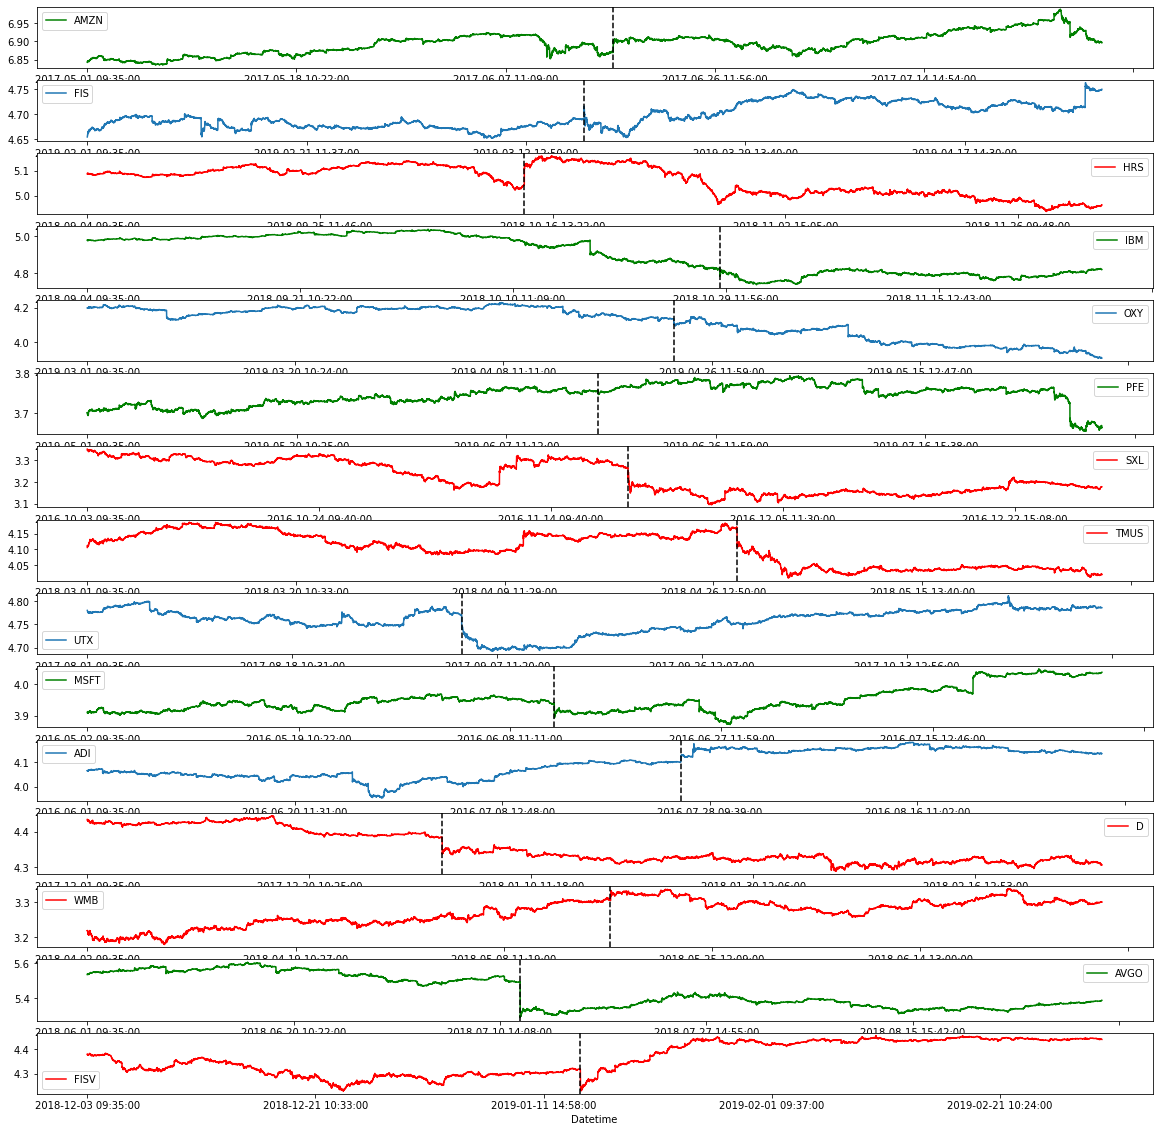

In [24]:
# Plots LogPrice for ACQS
f, a = plt.subplots(15,1,figsize=(20,20))
dfACQGroupDate.xs('AMZN').plot(y='logPrice',ax=a[0],label='AMZN',color='g')
a[0].axvline(AMZN_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FIS').plot(y='logPrice',ax=a[1],label='FIS')
a[1].axvline(FIS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('HRS').plot(y='logPrice',ax=a[2],label='HRS', color='r')
a[2].axvline(HRS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('IBM').plot(y='logPrice',ax=a[3],label='IBM',color='g')
a[3].axvline(IBM_DT, color='k', linestyle='--')

dfACQGroupDate.xs('OXY').plot(y='logPrice',ax=a[4],label='OXY')
a[4].axvline(OXY_DT, color='k', linestyle='--')

dfACQGroupDate.xs('PFE').plot(y='logPrice',ax=a[5],label='PFE',color='g')
a[5].axvline(PFE_DT, color='k', linestyle='--')

dfACQGroupDate.xs('SXL').plot(y='logPrice',ax=a[6],label='SXL',color='r')
a[6].axvline(SXL_DT, color='k', linestyle='--')

dfACQGroupDate.xs('TMUS').plot(y='logPrice',ax=a[7],label='TMUS',color='r')
a[7].axvline(TMUS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('UTX').plot(y='logPrice',ax=a[8],label='UTX')
a[8].axvline(UTX_DT, color='k', linestyle='--')

dfACQGroupDate.xs('MSFT').plot(y='logPrice',ax=a[9],label='MSFT',color='g')
a[9].axvline(MSFT_DT, color='k', linestyle='--')

dfACQGroupDate.xs('ADI').plot(y='logPrice',ax=a[10],label='ADI')
a[10].axvline(ADI_DT, color='k', linestyle='--')

dfACQGroupDate.xs('D').plot(y='logPrice',ax=a[11],label='D',color='r')
a[11].axvline(D_DT, color='k', linestyle='--')

dfACQGroupDate.xs('WMB').plot(y='logPrice',ax=a[12],label='WMB',color='r')
a[12].axvline(WMB_DT, color='k', linestyle='--')

dfACQGroupDate.xs('AVGO').plot(y='logPrice',ax=a[13],label='AVGO',color='g')
a[13].axvline(AVGO_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FISV').plot(y='logPrice',ax=a[14],label='FISV',color='r')
a[14].axvline(FISV_DT, color='k', linestyle='--')

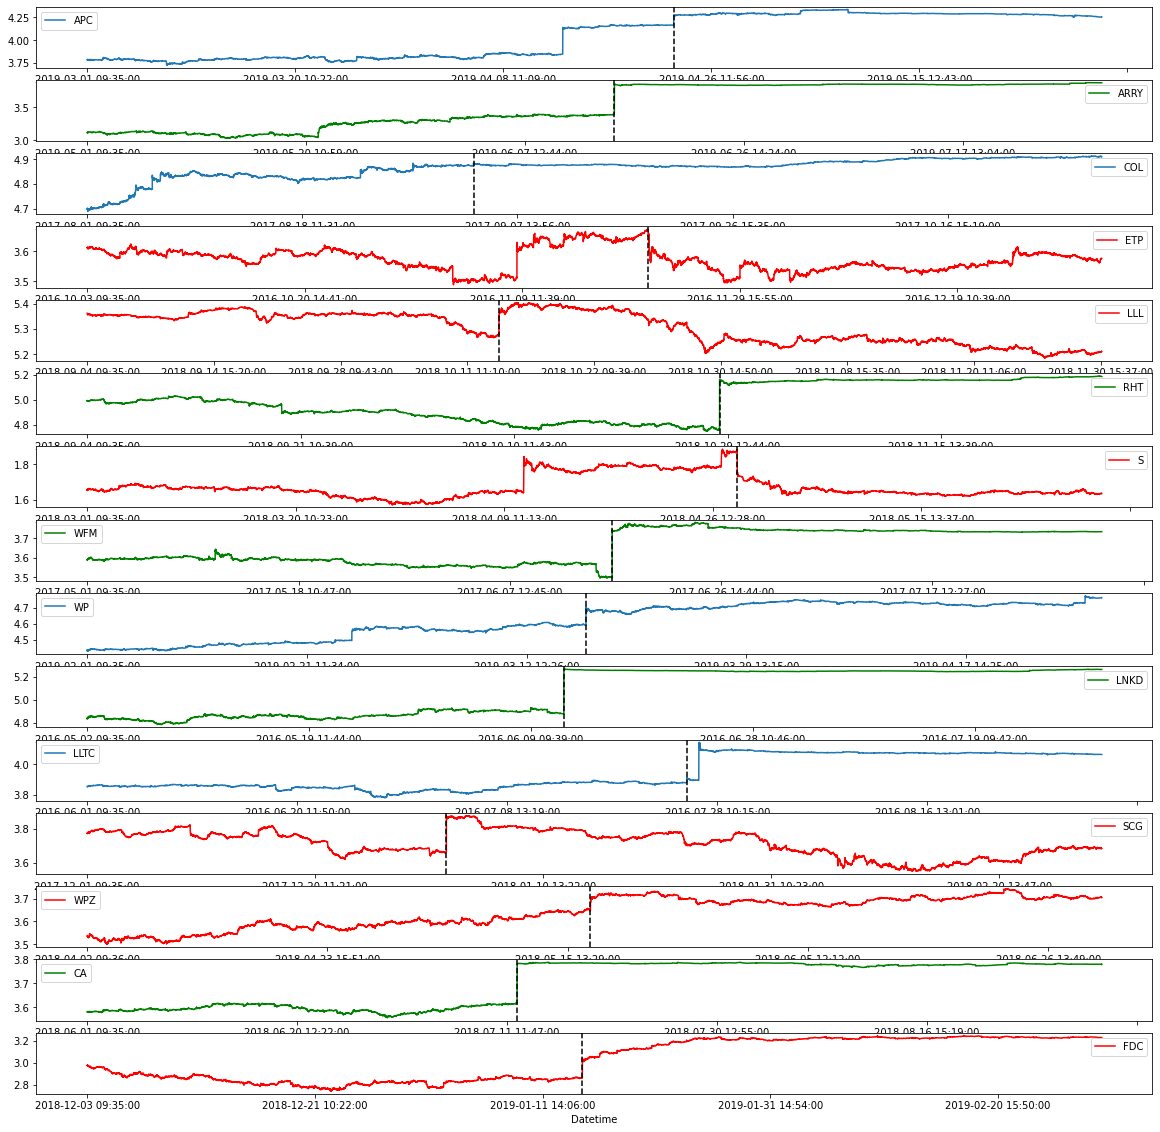

In [25]:
# Plot of logPrice over time for TAR by company
f, a = plt.subplots(15,1,figsize=(20,20))
dfTARGroupDate.xs('APC').plot(y='logPrice',ax=a[0],label='APC')
a[0].axvline(APC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ARRY').plot(y='logPrice',ax=a[1],label='ARRY',color='g')
a[1].axvline(ARRY_DT, color='k', linestyle='--')

dfTARGroupDate.xs('COL').plot(y='logPrice',ax=a[2],label='COL')
a[2].axvline(COL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ETP').plot(y='logPrice',ax=a[3],label='ETP',color='r')
a[3].axvline(ETP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLL').plot(y='logPrice',ax=a[4],label='LLL',color='r')
a[4].axvline(LLL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('RHT').plot(y='logPrice',ax=a[5],label='RHT',color='g')
a[5].axvline(RHT_DT, color='k', linestyle='--')

dfTARGroupDate.xs('S').plot(y='logPrice',ax=a[6],label='S',color='r')
a[6].axvline(S_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WFM').plot(y='logPrice',ax=a[7],label='WFM',color='g')
a[7].axvline(WFM_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WP').plot(y='logPrice',ax=a[8],label='WP')
a[8].axvline(WP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LNKD').plot(y='logPrice',ax=a[9],label='LNKD',color='g')
a[9].axvline(LNKD_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLTC').plot(y='logPrice',ax=a[10],label='LLTC')
a[10].axvline(LLTC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('SCG').plot(y='logPrice',ax=a[11],label='SCG',color='r')
a[11].axvline(SCG_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WPZ').plot(y='logPrice',ax=a[12],label='WPZ',color='r')
a[12].axvline(WPZ_DT, color='k', linestyle='--')

dfTARGroupDate.xs('CA').plot(y='logPrice',ax=a[13],label='CA',color='g')
a[13].axvline(CA_DT, color='k', linestyle='--')

dfTARGroupDate.xs('FDC').plot(y='logPrice',ax=a[14],label='FDC',color='r')
a[14].axvline(FDC_DT, color='k', linestyle='--')

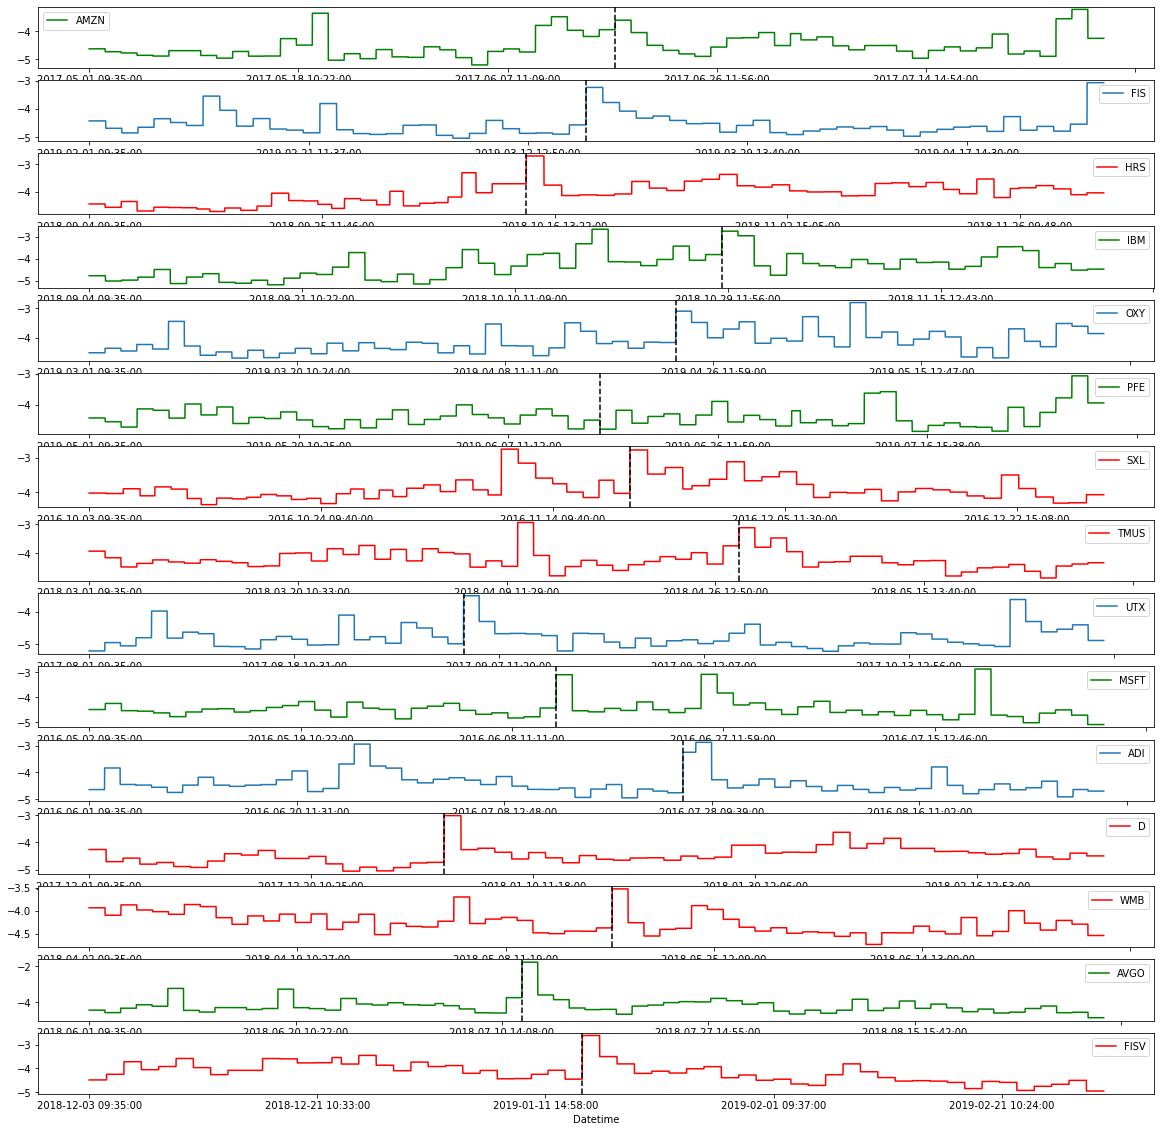

In [26]:
# Plots LogDayVolatility for ACQS
f, a = plt.subplots(15,1,figsize=(20,20))
dfACQGroupDate.xs('AMZN').plot(y='logDayVolatility',ax=a[0],label='AMZN',color='g')
a[0].axvline(AMZN_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FIS').plot(y='logDayVolatility',ax=a[1],label='FIS')
a[1].axvline(FIS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('HRS').plot(y='logDayVolatility',ax=a[2],label='HRS', color='r')
a[2].axvline(HRS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('IBM').plot(y='logDayVolatility',ax=a[3],label='IBM',color='g')
a[3].axvline(IBM_DT, color='k', linestyle='--')

dfACQGroupDate.xs('OXY').plot(y='logDayVolatility',ax=a[4],label='OXY')
a[4].axvline(OXY_DT, color='k', linestyle='--')

dfACQGroupDate.xs('PFE').plot(y='logDayVolatility',ax=a[5],label='PFE',color='g')
a[5].axvline(PFE_DT, color='k', linestyle='--')

dfACQGroupDate.xs('SXL').plot(y='logDayVolatility',ax=a[6],label='SXL',color='r')
a[6].axvline(SXL_DT, color='k', linestyle='--')

dfACQGroupDate.xs('TMUS').plot(y='logDayVolatility',ax=a[7],label='TMUS',color='r')
a[7].axvline(TMUS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('UTX').plot(y='logDayVolatility',ax=a[8],label='UTX')
a[8].axvline(UTX_DT, color='k', linestyle='--')

dfACQGroupDate.xs('MSFT').plot(y='logDayVolatility',ax=a[9],label='MSFT',color='g')
a[9].axvline(MSFT_DT, color='k', linestyle='--')

dfACQGroupDate.xs('ADI').plot(y='logDayVolatility',ax=a[10],label='ADI')
a[10].axvline(ADI_DT, color='k', linestyle='--')

dfACQGroupDate.xs('D').plot(y='logDayVolatility',ax=a[11],label='D',color='r')
a[11].axvline(D_DT, color='k', linestyle='--')

dfACQGroupDate.xs('WMB').plot(y='logDayVolatility',ax=a[12],label='WMB',color='r')
a[12].axvline(WMB_DT, color='k', linestyle='--')

dfACQGroupDate.xs('AVGO').plot(y='logDayVolatility',ax=a[13],label='AVGO',color='g')
a[13].axvline(AVGO_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FISV').plot(y='logDayVolatility',ax=a[14],label='FISV',color='r')
a[14].axvline(FISV_DT, color='k', linestyle='--')

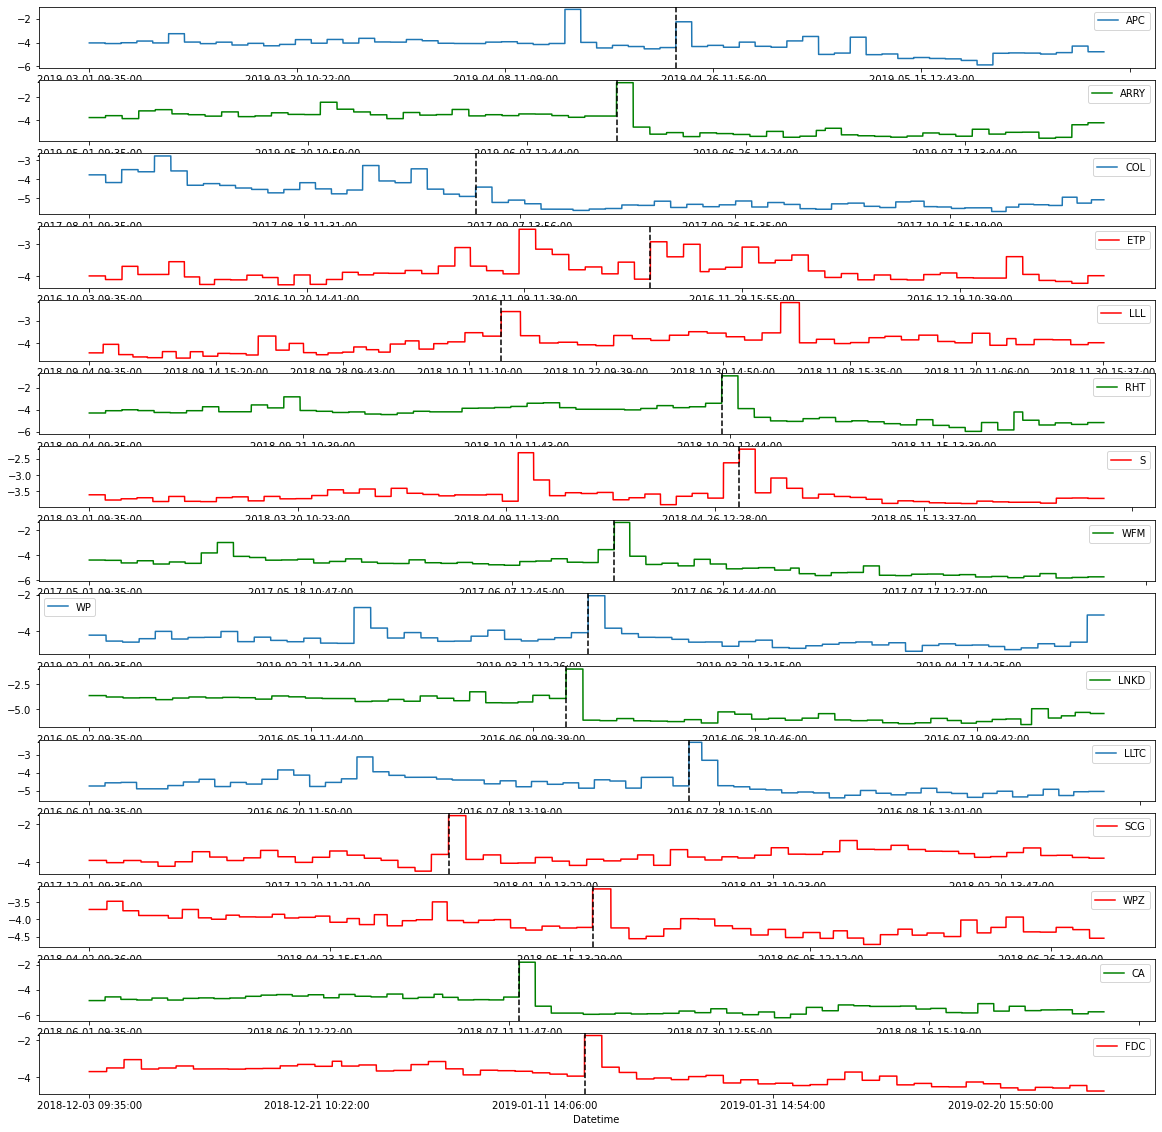

In [27]:
# Plot of logDayVolatility over time for TAR by company
f, a = plt.subplots(15,1,figsize=(20,20))
dfTARGroupDate.xs('APC').plot(y='logDayVolatility',ax=a[0],label='APC')
a[0].axvline(APC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ARRY').plot(y='logDayVolatility',ax=a[1],label='ARRY',color='g')
a[1].axvline(ARRY_DT, color='k', linestyle='--')

dfTARGroupDate.xs('COL').plot(y='logDayVolatility',ax=a[2],label='COL')
a[2].axvline(COL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ETP').plot(y='logDayVolatility',ax=a[3],label='ETP',color='r')
a[3].axvline(ETP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLL').plot(y='logDayVolatility',ax=a[4],label='LLL',color='r')
a[4].axvline(LLL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('RHT').plot(y='logDayVolatility',ax=a[5],label='RHT',color='g')
a[5].axvline(RHT_DT, color='k', linestyle='--')

dfTARGroupDate.xs('S').plot(y='logDayVolatility',ax=a[6],label='S',color='r')
a[6].axvline(S_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WFM').plot(y='logDayVolatility',ax=a[7],label='WFM',color='g')
a[7].axvline(WFM_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WP').plot(y='logDayVolatility',ax=a[8],label='WP')
a[8].axvline(WP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LNKD').plot(y='logDayVolatility',ax=a[9],label='LNKD',color='g')
a[9].axvline(LNKD_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLTC').plot(y='logDayVolatility',ax=a[10],label='LLTC')
a[10].axvline(LLTC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('SCG').plot(y='logDayVolatility',ax=a[11],label='SCG',color='r')
a[11].axvline(SCG_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WPZ').plot(y='logDayVolatility',ax=a[12],label='WPZ',color='r')
a[12].axvline(WPZ_DT, color='k', linestyle='--')

dfTARGroupDate.xs('CA').plot(y='logDayVolatility',ax=a[13],label='CA',color='g')
a[13].axvline(CA_DT, color='k', linestyle='--')

dfTARGroupDate.xs('FDC').plot(y='logDayVolatility',ax=a[14],label='FDC',color='r')
a[14].axvline(FDC_DT, color='k', linestyle='--')

In [54]:
volDict = {}
priceDict = {}
DayReturnsDict = {}

In [55]:
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'AMZN'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'WFM'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'AMZN'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'WFM'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['AMZN_WFM'] = volumeCov
priceDict['AMZN_WFM'] = priceCov
DayReturnsDict['AMZN_WFM'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.15261119195915152, 0.25746448569347996]
price cov: [-0.00035645109081305405, -9.537864273697968e-05]
DayReturns cov: [2.8722312050207486e-05, 0.00019332243101697854]


In [56]:
#Cash/Stock Merger
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'FIS'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'WP'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'FIS'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'WP'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['FIS_WP'] = volumeCov
priceDict['FIS_WP'] = priceCov
DayReturnsDict['FIS_WP'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.18688288743560647, 0.7756557398544319]
price cov: [-0.0001849136718007992, 0.00043898997485737666]
DayReturns cov: [3.2768798432998254e-05, 0.00010626189943319222]


In [57]:
#Stock Merger
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'HRS'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'LLL'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'HRS'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'LLL'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['HRS_LLL'] = volumeCov
priceDict['HRS_LLL'] = priceCov
DayReturnsDict['HRS_LLL'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.3390105416062072, 0.7451647481490442]
price cov: [0.000496972272240472, 0.004113462004928158]
DayReturns cov: [0.00017014828477665032, 0.0008875924699137941]


In [58]:
#Cash Acquisition
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'IBM'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'RHT'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'IBM'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'RHT'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['IBM_RHT'] = volumeCov
priceDict['IBM_RHT'] = priceCov
DayReturnsDict['IBM_RHT'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.1280606596844148, 0.4419000350533758]
price cov: [0.0028193211816150594, 0.00013153062392421235]
DayReturns cov: [6.21216735996131e-05, -0.0007729900131313777]


In [59]:
#Cash/Stock Acquisition
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'OXY'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'APC'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'OXY'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'APC'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['OXY_APC'] = volumeCov
priceDict['OXY_APC'] = priceCov
DayReturnsDict['OXY_APC'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.4253491962971515, 0.42705920351357907]
price cov: [-0.0020087737605963157, 0.00044079370795970386]
DayReturns cov: [1.004023640170333e-05, 0.0001513138828111696]


In [60]:
#Cash Acquisition
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'PFE'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'ARRY'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'PFE'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'ARRY'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['PFE_ARRY'] = volumeCov
priceDict['PFE_ARRY'] = priceCov
DayReturnsDict['PFE_ARRY'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.15426983788453527, 0.07377958280637643]
price cov: [0.002106647890216469, -4.796598103004303e-05]
DayReturns cov: [8.997195343783295e-05, 4.8190948500748285e-05]


In [61]:
#Stock Acquisition
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'SXL'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'ETP'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'SXL'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'ETP'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['SXL_ETP'] = volumeCov
priceDict['SXL_ETP'] = priceCov
DayReturnsDict['SXL_ETP'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.28435181450528485, 0.6842972379995301]
price cov: [0.0013740546815351785, 0.0005710776650675573]
DayReturns cov: [0.0003479418787205913, 0.0005966914450955817]


In [62]:
#Stock Merger
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'TMUS'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'S'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'TMUS'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'S'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['TMUS_S'] = volumeCov
priceDict['TMUS_S'] = priceCov
DayReturnsDict['TMUS_S'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.3471962655500584, 0.9522861909220575]
price cov: [0.0010135316911081436, 0.0003713049352019852]
DayReturns cov: [0.00025594876180230606, 0.0004918511177713009]


In [63]:
#Cash/Stock Acquisition
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'UTX'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'COL'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'UTX'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'COL'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['UTX_COL'] = volumeCov
priceDict['UTX_COL'] = priceCov
DayReturnsDict['UTX_COL'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.2571655573454371, 0.5154354850931258]
price cov: [-0.0002760282034721093, 0.00034412964084245585]
DayReturns cov: [-2.1597913990468027e-05, 1.8126091863593248e-06]


In [64]:
#Cash Acquisition
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'MSFT'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'LNKD'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'MSFT'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'LNKD'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['MSFT_LNKD'] = volumeCov
priceDict['MSFT_LNKD'] = priceCov
DayReturnsDict['MSFT_LNKD'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.1941439866938357, 0.2672530277287797]
price cov: [0.000502721495140129, 4.607371620523134e-05]
DayReturns cov: [0.00013602353124150538, -0.0003438332567977844]


In [65]:
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'ADI'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'LLTC'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'ADI'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'LLTC'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['ADI_LLTC'] = volumeCov
priceDict['ADI_LLTC'] = priceCov
DayReturnsDict['ADI_LLTC'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.24971436415794954, 0.6639994325706202]
price cov: [0.0007610129375663449, 0.00015955495569506834]
DayReturns cov: [0.00023324578742907302, 5.6894707029350276e-05]


In [66]:
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'D'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'SCG'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'D'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'SCG'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['D_SCG'] = volumeCov
priceDict['D_SCG'] = priceCov
DayReturnsDict['D_SCG'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.2486632498580111, 0.4275397421778918]
price cov: [0.0008348329813161425, 0.0008851214970757161]
DayReturns cov: [5.6974522417492194e-05, -0.00015414895658618266]


In [67]:
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'WMB'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'WPZ'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'WMB'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'WPZ'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['WMB_WPZ'] = volumeCov
priceDict['WMB_WPZ'] = priceCov
DayReturnsDict['WMB_WPZ'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.19797032276371074, 0.5775268148453553]
price cov: [0.0012173978849770338, 0.0002914470290688662]
DayReturns cov: [6.273012969294714e-05, 0.00019879800550717726]


In [68]:
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'AVGO'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'CA'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'AVGO'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'CA'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['AVGO_CA'] = volumeCov
priceDict['AVGO_CA'] = priceCov
DayReturnsDict['AVGO_CA'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.23750349580366323, 0.648655067668582]
price cov: [0.00024084294160068906, -0.0005276919131277154]
DayReturns cov: [5.90431275952731e-05, -0.0006529668356154291]


In [69]:
RtACQ_Before = dfACQBefore[dfACQBefore['Ticker'] == 'FISV'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_Before = dfTARBefore[dfTARBefore['Ticker'] == 'FDC'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_Before = pd.merge(RtACQ_Before, RtTAR_Before , on="Datetime")
corr_Before = np.cov(ACQ_TAR_Before['logVolume_x'],y = ACQ_TAR_Before['logVolume_y'])
corr1_Before = np.cov(ACQ_TAR_Before['logPrice_x'],y = ACQ_TAR_Before['logPrice_y'])
corr2_Before = np.cov(ACQ_TAR_Before['DayReturns_x'],y = ACQ_TAR_Before['DayReturns_y'])

RtACQ_After = dfACQAfter[dfACQAfter['Ticker'] == 'FISV'][['logVolume','logPrice','DayReturns','Datetime']]
RtTAR_After = dfTARAfter[dfTARAfter['Ticker'] == 'FDC'][['logVolume','logPrice','DayReturns','Datetime']]
ACQ_TAR_After = pd.merge(RtACQ_After, RtTAR_After , on="Datetime")
corr_After = np.cov(ACQ_TAR_After['logVolume_x'],y = ACQ_TAR_After['logVolume_y'])
corr1_After = np.cov(ACQ_TAR_After['logPrice_x'],y = ACQ_TAR_After['logPrice_y'])
corr2_After = np.cov(ACQ_TAR_After['DayReturns_x'],y = ACQ_TAR_After['DayReturns_y'])

volumeCov = [corr_Before[0][1],corr_After[0][1]]
priceCov = [corr1_Before[0][1],corr1_After[0][1]]
DayReturnsCov = [corr2_Before[0][1],corr2_After[0][1]]

volDict['FISV_FDC'] = volumeCov
priceDict['FISV_FDC'] = priceCov
DayReturnsDict['FISV_FDC'] = DayReturnsCov

print('volume cov: ' + str(volumeCov))
print('price cov: ' + str(priceCov))
print('DayReturns cov: ' + str(DayReturnsCov))

volume cov: [0.23275405462740822, 1.1116711148826557]
price cov: [0.0011129115033487538, 0.0020485967899318914]
DayReturns cov: [0.00031490595497734843, 2.777550379569633e-06]


In [70]:
dfVolCov = pd.DataFrame.from_dict(volDict, orient='index',columns=['Before', 'After'])
dfPriceCov = pd.DataFrame.from_dict(priceDict, orient='index',columns=['Before', 'After'])
dfDayReturnsCov = pd.DataFrame.from_dict(DayReturnsDict, orient='index',columns=['Before', 'After'])

In [71]:
dfVolCov['Change'] = 100 * (dfVolCov['After'] - dfVolCov['Before']) / dfVolCov['Before']
dfVolCov['type'] = ['C','H','S','C','H','C','S','S','H','C','H','S','S','C','S']
dfPriceCov['Change'] = 100 * (dfPriceCov['After'] - dfPriceCov['Before']) / dfPriceCov['Before']
dfPriceCov['type'] = ['C','H','S','C','H','C','S','S','H','C','H','S','S','C','S']
dfDayReturnsCov['Change'] = 100 * (dfDayReturnsCov['After'] - dfDayReturnsCov['Before']) / dfDayReturnsCov['Before']
dfDayReturnsCov['type'] = ['C','H','S','C','H','C','S','S','H','C','H','S','S','C','S']

In [72]:
dfVolCov

Before     After      Change type
AMZN_WFM   0.152611  0.257464   68.706163    C
FIS_WP     0.186883  0.775656  315.049099    H
HRS_LLL    0.339011  0.745165  119.805775    S
IBM_RHT    0.128061  0.441900  245.070872    C
OXY_APC    0.425349  0.427059    0.402024    H
PFE_ARRY   0.154270  0.073780  -52.174979    C
SXL_ETP    0.284352  0.684297  140.651616    S
TMUS_S     0.347196  0.952286  174.278927    S
UTX_COL    0.257166  0.515435  100.429439    H
MSFT_LNKD  0.194144  0.267253   37.657124    C
ADI_LLTC   0.249714  0.663999  165.903579    H
D_SCG      0.248663  0.427540   71.935235    S
WMB_WPZ    0.197970  0.577527  191.723935    S
AVGO_CA    0.237503  0.648655  173.113903    C
FISV_FDC   0.232754  1.111671  377.616219    S

In [73]:
dfPriceCov

Before     After      Change type
AMZN_WFM  -0.000356 -0.000095  -73.242152    C
FIS_WP    -0.000185  0.000439 -337.402660    H
HRS_LLL    0.000497  0.004113  727.704529    S
IBM_RHT    0.002819  0.000132  -95.334670    C
OXY_APC   -0.002009  0.000441 -121.943422    H
PFE_ARRY   0.002107 -0.000048 -102.276886    C
SXL_ETP    0.001374  0.000571  -58.438505    S
TMUS_S     0.001014  0.000371  -63.365237    S
UTX_COL   -0.000276  0.000344 -224.671913    H
MSFT_LNKD  0.000503  0.000046  -90.835141    C
ADI_LLTC   0.000761  0.000160  -79.033871    H
D_SCG      0.000835  0.000885    6.023782    S
WMB_WPZ    0.001217  0.000291  -76.059838    S
AVGO_CA    0.000241 -0.000528 -319.102088    C
FISV_FDC   0.001113  0.002049   84.075444    S

In [74]:
dfDayReturnsCov

Before     After       Change type
AMZN_WFM   0.000029  0.000193   573.074057    C
FIS_WP     0.000033  0.000106   224.277680    H
HRS_LLL    0.000170  0.000888   421.658194    S
IBM_RHT    0.000062 -0.000773 -1344.316143    C
OXY_APC    0.000010  0.000151  1407.074901    H
PFE_ARRY   0.000090  0.000048   -46.437810    C
SXL_ETP    0.000348  0.000597    71.491701    S
TMUS_S     0.000256  0.000492    92.167805    S
UTX_COL   -0.000022  0.000002  -108.392520    H
MSFT_LNKD  0.000136 -0.000344  -352.774835    C
ADI_LLTC   0.000233  0.000057   -75.607402    H
D_SCG      0.000057 -0.000154  -370.557699    S
WMB_WPZ    0.000063  0.000199   216.909923    S
AVGO_CA    0.000059 -0.000653 -1205.915053    C
FISV_FDC   0.000315  0.000003   -99.117975    S

In [84]:
TARMeansBf = dfTARBefore.groupby(['Ticker','Time'])['logPrice','returns','logDayVolatility','logVolume','logSpread'].mean()
TARMeansAf = dfTARAfter.groupby(['Ticker','Time'])['logPrice','returns','logDayVolatility','logVolume','logSpread'].mean()

ACQMeansBf = dfACQBefore.groupby(['Ticker','Time'])['logPrice','returns','logDayVolatility','logVolume','logSpread'].mean()
ACQMeansAf = dfACQAfter.groupby(['Ticker','Time'])['logPrice','returns','logDayVolatility','logVolume','logSpread'].mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list inst

In [85]:
TARmeanDiff = TARMeansBf.merge(TARMeansAf, how='outer', left_index=True, right_index=True)
TARmeanDiff['SpreadChange'] = 100 * (TARmeanDiff['logSpread_y'] - TARmeanDiff['logSpread_x'])
TARmeanDiff['volChange'] = 100 * (TARmeanDiff['logVolume_y'] - TARmeanDiff['logVolume_x'])
TARmeanDiff['VolatilityChange'] = 100 * (TARmeanDiff['logDayVolatility_y'] - TARmeanDiff['logDayVolatility_x'])
TARmeanDiff['ReturnChange'] = 100 * (TARmeanDiff['returns_y'] - TARmeanDiff['returns_x'])/ TARmeanDiff['returns_x']
TARmeanDiff['PriceChange'] = 100 * (TARmeanDiff['logPrice_y'] - TARmeanDiff['logPrice_x'])
TARmeanDiff = TARmeanDiff[['SpreadChange','volChange','VolatilityChange','PriceChange','ReturnChange']]
TARmeanDiff = TARmeanDiff.reset_index()
TARmeanDiff = TARmeanDiff.groupby('Ticker')['SpreadChange','volChange','VolatilityChange','PriceChange','ReturnChange'].mean()
TARmeanDiff['Type'] = ['H','C','C','H','S','S','S','H','C','C','S','S','C','H','S']
TARmeanDiff

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


SpreadChange  volChange  VolatilityChange  PriceChange  ReturnChange  \
Ticker                                                                         
APC       -11.509795  72.298341        -66.878383    41.925089   -102.120182   
ARRY      -43.479416  46.406371       -151.385499    61.912346     14.423175   
CA          4.023507  45.314395        -92.526572    18.333807    528.982154   
COL       -73.042528 -41.791906       -119.634161     6.246045   -108.752513   
ETP        -3.109284  48.803257          3.926920    -3.362020   -102.298959   
FDC         2.856093  29.207625        -63.540020    36.175554    -81.048964   
LLL        14.570335  71.777088         49.863205    -6.824747  -2313.788174   
LLTC        2.653599  13.445037        -47.913174    21.954912   -262.065844   
LNKD     -170.722974   6.758221       -191.824290    38.838271   -120.310464   
RHT       -85.915877  47.906558        -98.883382    27.145051   -143.995278   
S           1.015949  53.173498         -6.654173    -4.066074      1.145216   
SCG        37.611593  -8.652343         26.819125    -3.368126   -121.448834   
WFM         0.227164  45.968051        -75.212785    16.524728     46.856806   
WP        -15.834476  56.657626        -21.822516    20.341693   -846.317006   
WPZ       -57.160358  19.222304        -32.584018    12.184046   -216.059678   

       Type  
Ticker       
APC       H  
ARRY      C  
CA        C  
COL       H  
ETP       S  
FDC       S  
LLL       S  
LLTC      H  
LNKD      C  
RHT       C  
S         S  
SCG       S  
WFM       C  
WP        H  
WPZ       S

<AxesSubplot:xlabel='Ticker'>

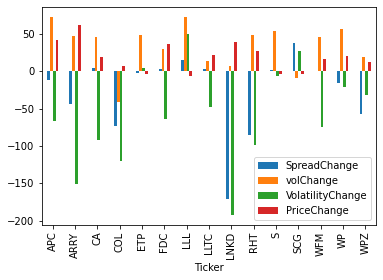

In [86]:
dfTest = TARmeanDiff[['SpreadChange','volChange','VolatilityChange','PriceChange']]
dfTest.plot(kind='bar')

In [87]:
ACQmeanDiff = ACQMeansBf.merge(ACQMeansAf, how='outer', left_index=True, right_index=True)
ACQmeanDiff['SpreadChange'] = 100 * (ACQmeanDiff['logSpread_y'] - ACQmeanDiff['logSpread_x'])
ACQmeanDiff['volChange'] = 100 * (ACQmeanDiff['logVolume_y'] - ACQmeanDiff['logVolume_x'])
ACQmeanDiff['VolatilityChange'] = 100 * (ACQmeanDiff['logDayVolatility_y'] - ACQmeanDiff['logDayVolatility_x'])
ACQmeanDiff['ReturnChange'] = 100 * (ACQmeanDiff['returns_y'] - ACQmeanDiff['returns_x'])/ ACQmeanDiff['returns_x']
ACQmeanDiff['PriceChange'] = 100 * (ACQmeanDiff['logPrice_y'] - ACQmeanDiff['logPrice_x'])
ACQmeanDiff = ACQmeanDiff[['SpreadChange','volChange','VolatilityChange','PriceChange','ReturnChange']]
ACQmeanDiff = ACQmeanDiff.reset_index()
ACQmeanDiff = ACQmeanDiff.groupby('Ticker')['SpreadChange','volChange','VolatilityChange','PriceChange','ReturnChange'].mean()
ACQmeanDiff['Type'] = ['H','C','C','S','H','S','S','C','C','H','C','S','S','H','S']
ACQmeanDiff

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


SpreadChange   volChange  VolatilityChange  PriceChange  ReturnChange  \
Ticker                                                                          
ADI         8.521145   23.541626         -5.065710    10.058473   -661.732707   
AMZN       24.312149    3.873179         18.854051     3.199044   -216.330111   
AVGO      -33.685930   54.963837          2.199769   -17.645061    -73.650821   
D           2.743395   92.311382         36.259736    -8.968079   -273.703770   
FIS       -21.602788   74.051508         11.215144     3.636225   -283.054042   
FISV      -72.388528  115.185254        -34.826577    11.102043    -78.759070   
HRS        19.757642   88.341641         50.026906    -6.393758   -238.464295   
IBM         6.612003   46.753954         37.377812   -18.022749    163.645932   
MSFT        0.084155   34.864422          9.415285     2.378917   -290.658510   
OXY       -14.659212  132.645510         39.160706   -16.436973  -1069.892494   
PFE         1.192986   -0.461344          4.881366     2.836438   -216.767324   
SXL       -15.380931   93.066141         12.457464   -12.584931     78.000565   
TMUS       -4.069691   18.106565         -9.361650    -9.524813   -127.999496   
UTX        -8.984464   16.023490          2.768695    -1.270537    -83.247908   
WMB        -0.023705    7.297408        -15.760739     5.348144    -57.097963   

       Type  
Ticker       
ADI       H  
AMZN      C  
AVGO      C  
D         S  
FIS       H  
FISV      S  
HRS       S  
IBM       C  
MSFT      C  
OXY       H  
PFE       C  
SXL       S  
TMUS      S  
UTX       H  
WMB       S

<AxesSubplot:xlabel='Ticker'>

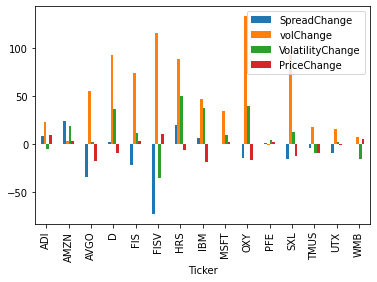

In [88]:
dfTest= ACQmeanDiff[['SpreadChange','volChange','VolatilityChange','PriceChange']]
dfTest.plot(kind='bar')

In [19]:
ACQ_Announce = df[(df['Ticker'] == 'AMZN') &(df['DATE'] == '2017-06-16')]
TAR_Announce = df[(df['Ticker'] == 'WFM') &(df['DATE'] == '2017-06-16')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("AMZN_WFM DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'FIS') &(df['DATE'] == '2019-03-18')]
TAR_Announce = df[(df['Ticker'] == 'WP') &(df['DATE'] == '2019-03-18')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("FIS_WP DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'HRS') &(df['DATE'] == '2018-10-15')]
TAR_Announce = df[(df['Ticker'] == 'LLL') &(df['DATE'] == '2018-10-15')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("HRS_LLL DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'IBM') &(df['DATE'] == '2018-10-29')]
TAR_Announce = df[(df['Ticker'] == 'RHT') &(df['DATE'] == '2018-10-29')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("IBM_RHT DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'MSFT') &(df['DATE'] == '2016-06-13')]
TAR_Announce = df[(df['Ticker'] == 'LNKD') &(df['DATE'] == '2016-06-13')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("MSFT_LNKD DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'OXY') &(df['DATE'] == '2019-04-24')]
TAR_Announce = df[(df['Ticker'] == 'APC') &(df['DATE'] == '2019-04-24')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("OXY_APC DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'PFE') &(df['DATE'] == '2019-06-17')]
TAR_Announce = df[(df['Ticker'] == 'ARRY') &(df['DATE'] == '2019-06-17')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("PFE_ARRY DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'SXL') &(df['DATE'] == '2016-11-21')]
TAR_Announce = df[(df['Ticker'] == 'ETP') &(df['DATE'] == '2016-11-21')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("SXL_ETP DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'TMUS') &(df['DATE'] == '2018-04-30')]
TAR_Announce = df[(df['Ticker'] == 'S') &(df['DATE'] == '2018-04-30')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("TMUS_S DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'UTX') &(df['DATE'] == '2017-09-05')]
TAR_Announce = df[(df['Ticker'] == 'COL') &(df['DATE'] == '2017-09-05')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("UTX_COL DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'ADI') &(df['DATE'] == '2016-07-26')]
TAR_Announce = df[(df['Ticker'] == 'LLTC') &(df['DATE'] == '2016-07-26')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("ADI_LLTC DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'D') &(df['DATE'] == '2018-01-03')]
TAR_Announce = df[(df['Ticker'] == 'SCG') &(df['DATE'] == '2018-01-03')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("D_SCG DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'WMB') &(df['DATE'] == '2018-05-17')]
TAR_Announce = df[(df['Ticker'] == 'WPZ') &(df['DATE'] == '2018-05-17')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("WMB_WPZ DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'AVGO') &(df['DATE'] == '2018-07-12')]
TAR_Announce = df[(df['Ticker'] == 'CA') &(df['DATE'] == '2018-07-12')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("AVGO_CA DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

ACQ_Announce = df[(df['Ticker'] == 'FISV') &(df['DATE'] == '2019-01-16')]
TAR_Announce = df[(df['Ticker'] == 'FDC') &(df['DATE'] == '2019-01-16')]
ACQ_TAR_Announce = pd.merge(ACQ_Announce, TAR_Announce , on="Datetime")
corr_Vol = np.cov(ACQ_TAR_Announce['logVolume_x'],y = ACQ_TAR_Announce['logVolume_y'])[0][1]
corr_Price = np.cov(ACQ_TAR_Announce['logPrice_x'],y = ACQ_TAR_Announce['logPrice_y'])[0][1]
corr_Return = np.cov(ACQ_TAR_Announce['returns_x'],y = ACQ_TAR_Announce['returns_y'])[0][1]
print("FISV_FDC DEAL")
print('volume cov: ' + str(corr_Vol))
print('price cov: ' + str(corr_Price))
print('returns cov: ' + str(corr_Return))
print("")

AMZN_WFM DEAL
volume cov: 0.23991466016192345
price cov: 5.715212531287674e-07
returns cov: -1.093865090867441e-07

FIS_WP DEAL
volume cov: 0.41293467949708995
price cov: 4.7846880804955985e-05
returns cov: 1.073552905649678e-05

HRS_LLL DEAL
volume cov: 0.43304879778160105
price cov: 0.00020142059908980547
returns cov: 1.2747128953984859e-05

IBM_RHT DEAL
volume cov: 0.19966503787512915
price cov: 2.1237636747129636e-05
returns cov: -4.277034915602733e-05

MSFT_LNKD DEAL
volume cov: 0.4900598004228369
price cov: -3.944694433781523e-06
returns cov: -4.222107002967349e-05

OXY_APC DEAL
volume cov: 0.38611139629757746
price cov: 5.262238772841569e-06
returns cov: -9.835450345854356e-06

PFE_ARRY DEAL
volume cov: 0.17363922521156536
price cov: -3.4290738022798914e-06
returns cov: -1.3647358978936769e-06

SXL_ETP DEAL
volume cov: 0.6023702084818733
price cov: 0.00027295115059332124
returns cov: 4.381409370898995e-06

TMUS_S DEAL
volume cov: 0.45755711875284477
price cov: 0.0001264574052971